# Author Details:
- Name: Adam Smulczyk
- Email: adam.smulczyk@gmail.com
- Profile: [Github](https://github.com/AdamSmulczyk)
- [Github Repository](https://github.com/AdamSmulczyk/https://github.com/AdamSmulczyk/014_Poisonous_Mushrooms)

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents ℹ️</div>

<a id="toc"></a>
- [I. PLANNING](#I)
    - [I.1 Introduction](#I.1)
    - [I.2 Dataset description](#I.2)
    - [I.3 Project assumptions](#I.3)
        - [I.3.1 Defining the problem](#I.3.1)
        - [I.3.2 Assessing the scope](#I.3.2)
        - [I.3.3 Success metric](#I.3.3)
        - [I.3.4 Feasibility  of the ML application](#I.3.4)
- [II.DATA COLLECTION AND PREPARATION](#II)
    - [II.1 Import libraries and data files](#II.1)
    - [II.2 Exploratory data analysis (EDA)](#II.2)
        - [II.2.1 Reading data & target C=class distribution](#II.2.1)
        - [II.2.2 Statistical summary](#II.2.2)
        - [II.2.3 Correlation Matrics](#II.2.3)
        - [II.2.4 Missing values, categorical data transformation](#II.2.4)
        - [II.2.5 Distribution of attributes with fewer than 10 unique values](#II.2.5)
        - [II.2.6 Distribution of numerical features](#II.2.6)
        - [II.2.7 Distribution of categorical features](#II.2.7)
        - [II.2.8 Distribution of target class in season](#II.2.8)
        - [II.2.9 Correlations between Numerical Features](#II.2.9)
- [III DATA PRE-PROCESSING (data cleaning)](#III)  
    - [III.1 Target encoding](#III.1)
    - [III.2 Filling nulls](#III.2)
    - [III.3 Removing duplicates and unnecessary columns](#III.3)
    - [III.4 Filling nulls](#III.4)
    - [III.5 Filling nulls](#III.5)
    - [III.6 Convert types (downcasting)](#III.6)
- [IV DATA PROCESSING](#IV)        
    - [IV.1 Skewness of distributions](#IV.1)
    - [IV.2 Detect outlier](#IV.2)
    - [IV.3 Categorical data transformation](#IV.3)   
    - [IV.4 Normalizing](#IV.4)     
    - [IV.5 TSN](#IV.5)
    - [IV.6 PCA](#IV.6)
    - [IV.7 Feature selection](#IV.7)
    - [IV.8 Imbalanced target - oversampling by SMOTEE](#IV.8)
- [V MODEL ENGINEERING](#V)
    - [V.1 Sequencial API Model 1](#V.1) 
    - [V.1.1 Sequencial API Model 2](#V.1.1) 
    - [V.2 CatBoostClassifier](#V.2) 
        - [V.2.1 CatBoostClassifier - Validation](#V.2.1)    
    - [V.3 XGBoostClassifier](#V.3)
        - [V.3.1 XGBoostClassifier - Validation](#V.3.1) 
    - [V.4 RandomForestClassifier](#V.4)
        - [V.4.1 RandomForestClassifier - Validation](#V.4.1)
        - [V.4.2 RandomForestClassifier - TunedThresholdClassifierCV](#V.4.2)
    - [V.5 LGBMClassifier](#V.5) 
        - [V.5.1 LGBMClassifier - Validation](#V.5.1)
    - [V.6 VotingClassifier](#V.3)
        - [V.6.1 VotingClassifier - Validation](#V.6.1)   
        - [V.6.2 VotingClassifier - Evaluation](#V.6.2) 
- [VI CONCLUSION](#VI)       

<a id="I"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700">I <span style='color:#CDA63A'>|</span>PLANNING 👨‍🏫</div>

 ### <a id="I.1"></a><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.1 Introduction</p>

The goal is to predict whether a mushroom is edible or poisonous based on its physical features, such as color, shape, and texture.

To tackle this problem, we'll be analyzing a special dataset. This dataset was created by a deep learning model that studied thousands of mushrooms. While the data is similar to a well-known mushroom dataset, there are some differences that make this project unique.

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

 ### <a id="I.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.2 Dataset description</p>

Feature Description
* Feature <code>Cap Diameter</code>: The measurement of the cap across its widest point. It helps in identifying the mushroom’s size and can range from a few millimeters to several centimeters.

* Feature <code>Cap Shape</code>: The overall shape of the cap, such as conical, bell-shaped, flat, or wavy. This characteristic helps in distinguishing different species.

* Feature <code>Cap Surface</code>: The texture and appearance of the cap’s surface. It can be smooth, scaly, sticky, or wrinkled, providing clues about the mushroom’s identity.

* Feature <code>Cap Color</code>: The color of the cap, which can vary widely and may change as the mushroom matures. Color can be a key factor in identifying species.

* Feature <code>Does Bruise or Bleed</code>: Refers to whether the mushroom changes color when bruised or if it releases a colored liquid. This reaction can be important for identification.

* Feature <code>Gill Attachment</code>: How the gills are attached to the stem. They can be free (not attached), attached (connected to the stem), or descending (extending down the stem).

* Feature <code>Gill Spacing</code>: The distance between gills. Gills can be crowded, spaced, or intermediate in their spacing.

* Feature <code>Gill Color</code>: The color of the gills, which can help in distinguishing species and may change with age.

* Feature <code>Stem Height</code>: The length of the stem from the ground to where the cap is attached. Variations in stem height can aid in identification.

* Feature <code>Stem Width</code>: The diameter of the stem. It can be narrow, medium, or wide, and varies among species.

* Feature <code>Stem Root</code>: The base of the stem, which can be swollen, bulbous, or tapering. Observing the stem’s base can help identify certain mushrooms.

* Feature <code>Stem Surface</code>: The texture and appearance of the stem’s surface. It can be smooth, fibrous, scaly, or rough.

* Feature <code>Stem Color</code>: The color of the stem, which might be uniform or vary along its length.

* Feature <code>Veil Type</code>: Refers to the type of veil present on the mushroom, such as a partial veil (covering the gills and often forming a ring) or a universal veil (enveloping the entire mushroom in its early stages).

* Feature <code>Veil Color</code>: The color of the veil. It can be a key characteristic for identifying mushrooms, especially in distinguishing between species with similar appearances.

* Feature <code>Has Ring</code>: Indicates whether the mushroom has a ring (also called an annulus) around the stem, which is a remnant of the partial veil.

* Feature <code>Ring Type</code>: Describes the type of ring present, such as a single ring, double ring, or a ring that is flaring or hanging.

* Feature <code>Spore Print Color</code>: The color of the spore print obtained by placing the cap on a white sheet of paper. This is a critical identifying feature.

* Feature <code>Habitat</code>: The environment where the mushroom is found, such as woodlands, grasslands, or urban areas. The habitat can help narrow down the possible species.

* Feature <code>Season</code>: The time of year when the mushroom appears. Different species fruit in different seasons, which helps in identification.

 ### <a id="I.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3 Project assumptions 🎯</p>

 ### <a id="I.3.1"></a><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.1 Defining the problem</p>

This project will be implemented based on a real dataset, provided by the project organizer. The goal is to develop a model that can classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

 ### <a id="I.3.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.2 Assessing the scope</p>

The entire project was done in Python, using Jupyter. Defining the scope of the project, its purpose and priorities determines the type of approach to it.
In this case, the main goal is to predict whether a mushroom is edible or poisonous based on its physical features, such as color, shape, and texture.

 ### <a id="I.3.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.3 Success metric</p>

The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.
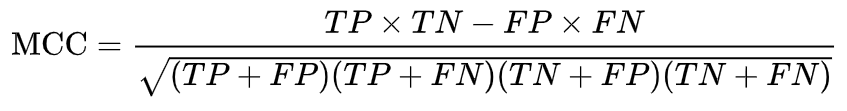
https://en.wikipedia.org/wiki/Phi_coefficient

 ### <a id="I.3.4"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.4 Feasibility  of the ML application</p>

The feasibility of the project plan should be assessed to decide whether you are able to build a reliable predictive model with such a small sample of data. Or, can we get new data?

Feature engineering will be used for this purpose to obtain a more complete set of predictive attributes. An additional aspect that will affect the assessment of the project feasibility is the provided test data set, which will be used to verify the quality of the obtained predictive model.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="II"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700">II <span style='color:#CDA63A'>|</span>DATA COLLECTION AND PREPARATION 👨‍💻</div>

 ### <a id="II.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.1 Import libraries and data files💾</p>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import datasets, metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 
from time import time, sleep
from tqdm import tqdm
import datetime
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
# import skimpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# CONFIGURATIONS
# ------------------------------------------------------
%matplotlib inline
pd.set_option('float_format', '{:.3f}'.format)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

background_color = '#f0f0f0'
background_color2 = '#FFFFFF'
sns.set_style("whitegrid", {"axes.facecolor": background_color2})

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':

                if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
print('-' * 80)
print('train')
train = import_data('train.csv')

print('-' * 80)
print('test')
test = import_data('test.csv')

--------------------------------------------------------------------------------
train
Memory usage of dataframe is 523.17 MB
Memory usage after optimization is: 101.10 MB
Decreased by 80.7%
--------------------------------------------------------------------------------
test
Memory usage of dataframe is 332.93 MB
Memory usage after optimization is: 65.42 MB
Decreased by 80.3%


In [4]:
train=train.sample(50000)

 ### <a id="II.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2 Exploratory data analysis (EDA)📊</p>

In [ ]:
# import skimpy
# skimpy.skim(train)

In [5]:
print('train shape is {}'.format(train.shape))
print('test shape is {}'.format(test.shape))

train shape is (3116945, 22)
test shape is (2077964, 21)


In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Informatioan:
<li> There is no duplicates in both files.
</ul>
</div>

In [28]:
for i in tqdm(range(0,3), ncols = 100, desc ="Loading data.."): 
    df= train.copy()
    df= df.drop(columns=['id'])

Loading data..: 100%|█████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.87it/s]


 ### <a id="II.2.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.1 Reading data & target class distribution 📚</p>

In [11]:
df

class  cap-diameter cap-shape cap-surface cap-color  \
0           e         8.800         f           s         u   
1           p         4.510         x           h         o   
2           e         6.940         f           s         b   
3           e         3.880         f           y         g   
4           e         5.850         x           l         w   
...       ...           ...       ...         ...       ...   
3116940     e         9.290         f         NaN         n   
3116941     e        10.880         s         NaN         w   
3116942     p         7.820         x           e         e   
3116943     e         9.450         p           i         n   
3116944     p         3.200         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          f               a            c          w   
1                          f               a            c          n   
2                          f               x            c          w   
3                          f               s          NaN          g   
4                          f               d          NaN          w   
...                      ...             ...          ...        ...   
3116940                    t             NaN          NaN          w   
3116941                    t               d            c          p   
3116942                    f               a          NaN          w   
3116943                    t               e          NaN          p   
3116944                    f               d            c          w   

         stem-height  stem-width stem-root stem-surface stem-color veil-type  \
0              4.510      15.390       NaN          NaN          w       NaN   
1              4.790       6.480       NaN            y          o       NaN   
2              6.850       9.930       NaN            s          n       NaN   
3              4.160       6.530       NaN          NaN          w       NaN   
4              3.370       8.360       NaN          NaN          w       NaN   
...              ...         ...       ...          ...        ...       ...   
3116940       12.140      18.810         b          NaN          w         u   
3116941        6.650      26.970       NaN          NaN          w       NaN   
3116942        9.510      11.060       NaN          NaN          y       NaN   
3116943        9.130      17.770       NaN            y          w       NaN   
3116944        2.820       7.790       NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
0              NaN        f         f               NaN       d      a  
1              NaN        t         z               NaN       d      w  
2              NaN        f         f               NaN       l      w  
3              NaN        f         f               NaN       d      u  
4              NaN        f         f               NaN       g      a  
...            ...      ...       ...               ...     ...    ...  
3116940          w        t         g               NaN       d      u  
3116941        NaN        f         f               NaN       d      u  
3116942          w        t         z               NaN       d      a  
3116943        NaN        t         p               NaN       d      u  
3116944        NaN        f         f               NaN       g      u  

[3116945 rows x 21 columns]

In [10]:
df['class'].unique()

['e', 'p']
Categories (2, object): ['e', 'p']

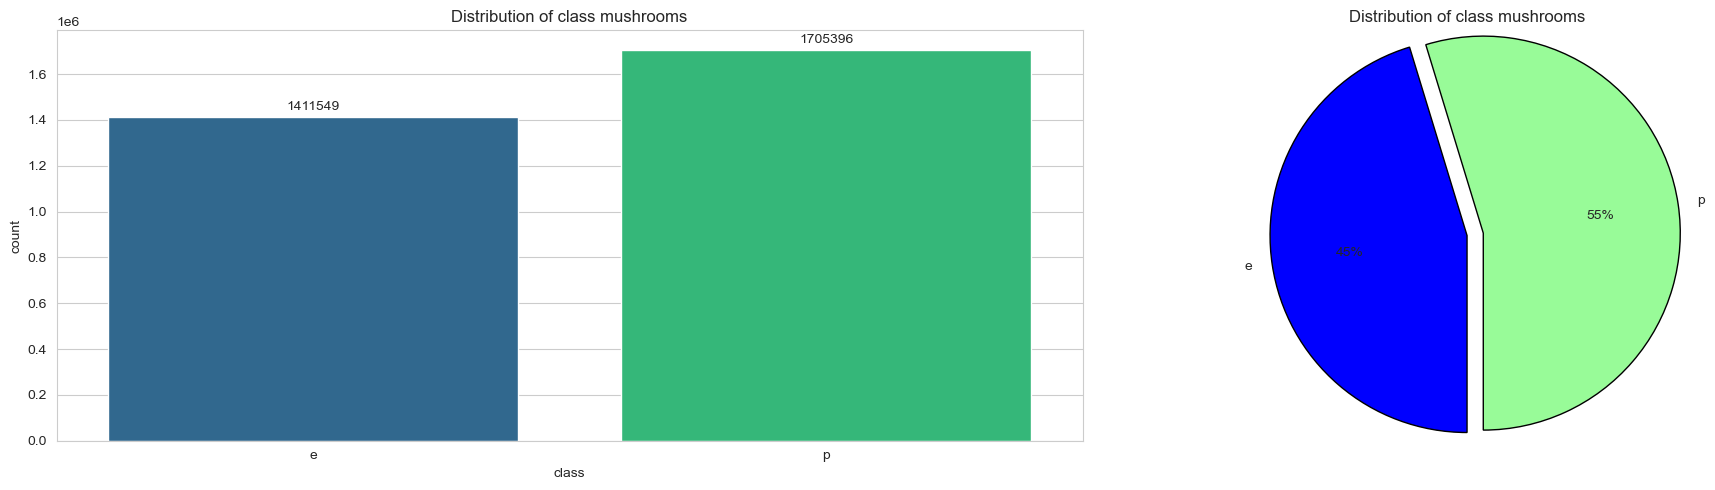

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(121)
chart = sns.countplot(x='class',
              data=train, saturation=1,
              palette='viridis')
plt.title('Distribution of class mushrooms')
# chart.bar_label(chart.containers[0])
chart.bar_label(chart.containers[0], fmt='%.0f', padding=3)

plt.subplot(122)
class_counts = df["class"].value_counts(normalize=True)
plt.pie(class_counts, 
        labels=class_counts.index, 
        autopct='%1.0f%%',  
        colors=['palegreen','blue'], 
        startangle=270, radius=1.2,
        wedgeprops={'edgecolor': 'black'},
        explode=(0.1, 0))
plt.title('Distribution of class mushrooms');
plt.tight_layout();
plt.show()

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> There is 3116945 records but distribution is almost equal, e-45%, p-55%.
</ul>
</div>

 ### <a id="II.2.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.2 Statistical summary 🔢</p>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   class                 category
 1   cap-diameter          float16 
 2   cap-shape             category
 3   cap-surface           category
 4   cap-color             category
 5   does-bruise-or-bleed  category
 6   gill-attachment       category
 7   gill-spacing          category
 8   gill-color            category
 9   stem-height           float16 
 10  stem-width            float16 
 11  stem-root             category
 12  stem-surface          category
 13  stem-color            category
 14  veil-type             category
 15  veil-color            category
 16  has-ring              category
 17  ring-type             category
 18  spore-print-color     category
 19  habitat               category
 20  season                category
dtypes: category(18), float16(3)
memory usage: 71.4 MB


In [7]:
def statistical_summary_numerical(df: pd.DataFrame):
    df = df.select_dtypes(include='number')
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)
    desc["skew"] = df.skew()
    desc["kurtosis"] = df.kurtosis()
    desc = desc.round(2)
    return desc

statistical_summary_numerical(df)

type    count  nunique  %unique  null  %null   mean   std  \
cap-diameter  float32  3116941     3913    0.130     4  0.000  6.310 4.650   
stem-height   float32  3116945     2749    0.090     0  0.000  6.350 2.690   
stem-width    float32  3116945     5836    0.190     0  0.000 11.150 8.090   

               min   25%   50%    75%     max  skew  kurtosis  
cap-diameter 0.030 3.320 5.750  8.240  80.670 3.970    32.740  
stem-height  0.000 4.670 5.880  7.410  88.720 1.930     7.760  
stem-width   0.000 4.970 9.650 15.630 102.900 1.240     2.450

In [8]:
def statistical_summary_categorical(df: pd.DataFrame):
    df = df.select_dtypes(include='category')
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    return desc

statistical_summary_categorical(df)

type    count  nunique  %unique     null  %null
class                 category  3116945        2    0.000        0  0.000
cap-shape             category  3116905       74    0.002       40  0.001
cap-surface           category  2445922       83    0.003   671023 21.528
cap-color             category  3116933       78    0.003       12  0.000
does-bruise-or-bleed  category  3116937       26    0.001        8  0.000
gill-attachment       category  2593009       78    0.003   523936 16.809
gill-spacing          category  1858510       48    0.002  1258435 40.374
gill-color            category  3116888       63    0.002       57  0.002
stem-root             category   359922       38    0.001  2757023 88.453
stem-surface          category  1136084       60    0.002  1980861 63.551
stem-color            category  3116907       59    0.002       38  0.001
veil-type             category   159452       22    0.001  2957493 94.884
veil-color            category   375998       24    0.001  2740947 87.937
has-ring              category  3116921       23    0.001       24  0.001
ring-type             category  2988065       40    0.001   128880  4.135
spore-print-color     category   267263       32    0.001  2849682 91.425
habitat               category  3116900       52    0.002       45  0.001
season                category  3116945        4    0.000        0  0.000

In [56]:
print(f'{df.memory_usage().sum()/(1000000)} MB')

74.8374 MB


<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions: 
<li>  With three million rows, the training dataset is huge. And with this large amount of data, we'll focus on gradient-boosted tree models and neural networks.
<li> Most features have missing values. We'll either use models which can deal with missing values natively, or we'll have to impute the missing values.
<li> Most features are categorical. We can experiment with one-hot encoding and target encoding.
<li> For numerical data skew is normal.
<li> Categorical data can't be dummies because nunique value for them is high.
</ul>
</div>

 ### <a id="II.2.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.3 Correlation Matrics🎛️</p>

In [57]:
df_2= train.copy()
df_2 = df_2.drop(columns="id")
object_columns = df_2.select_dtypes(include=['category'])

matrix = df_2.copy()
for i in object_columns:
    matrix[i]  = matrix[i].rank(method='dense')

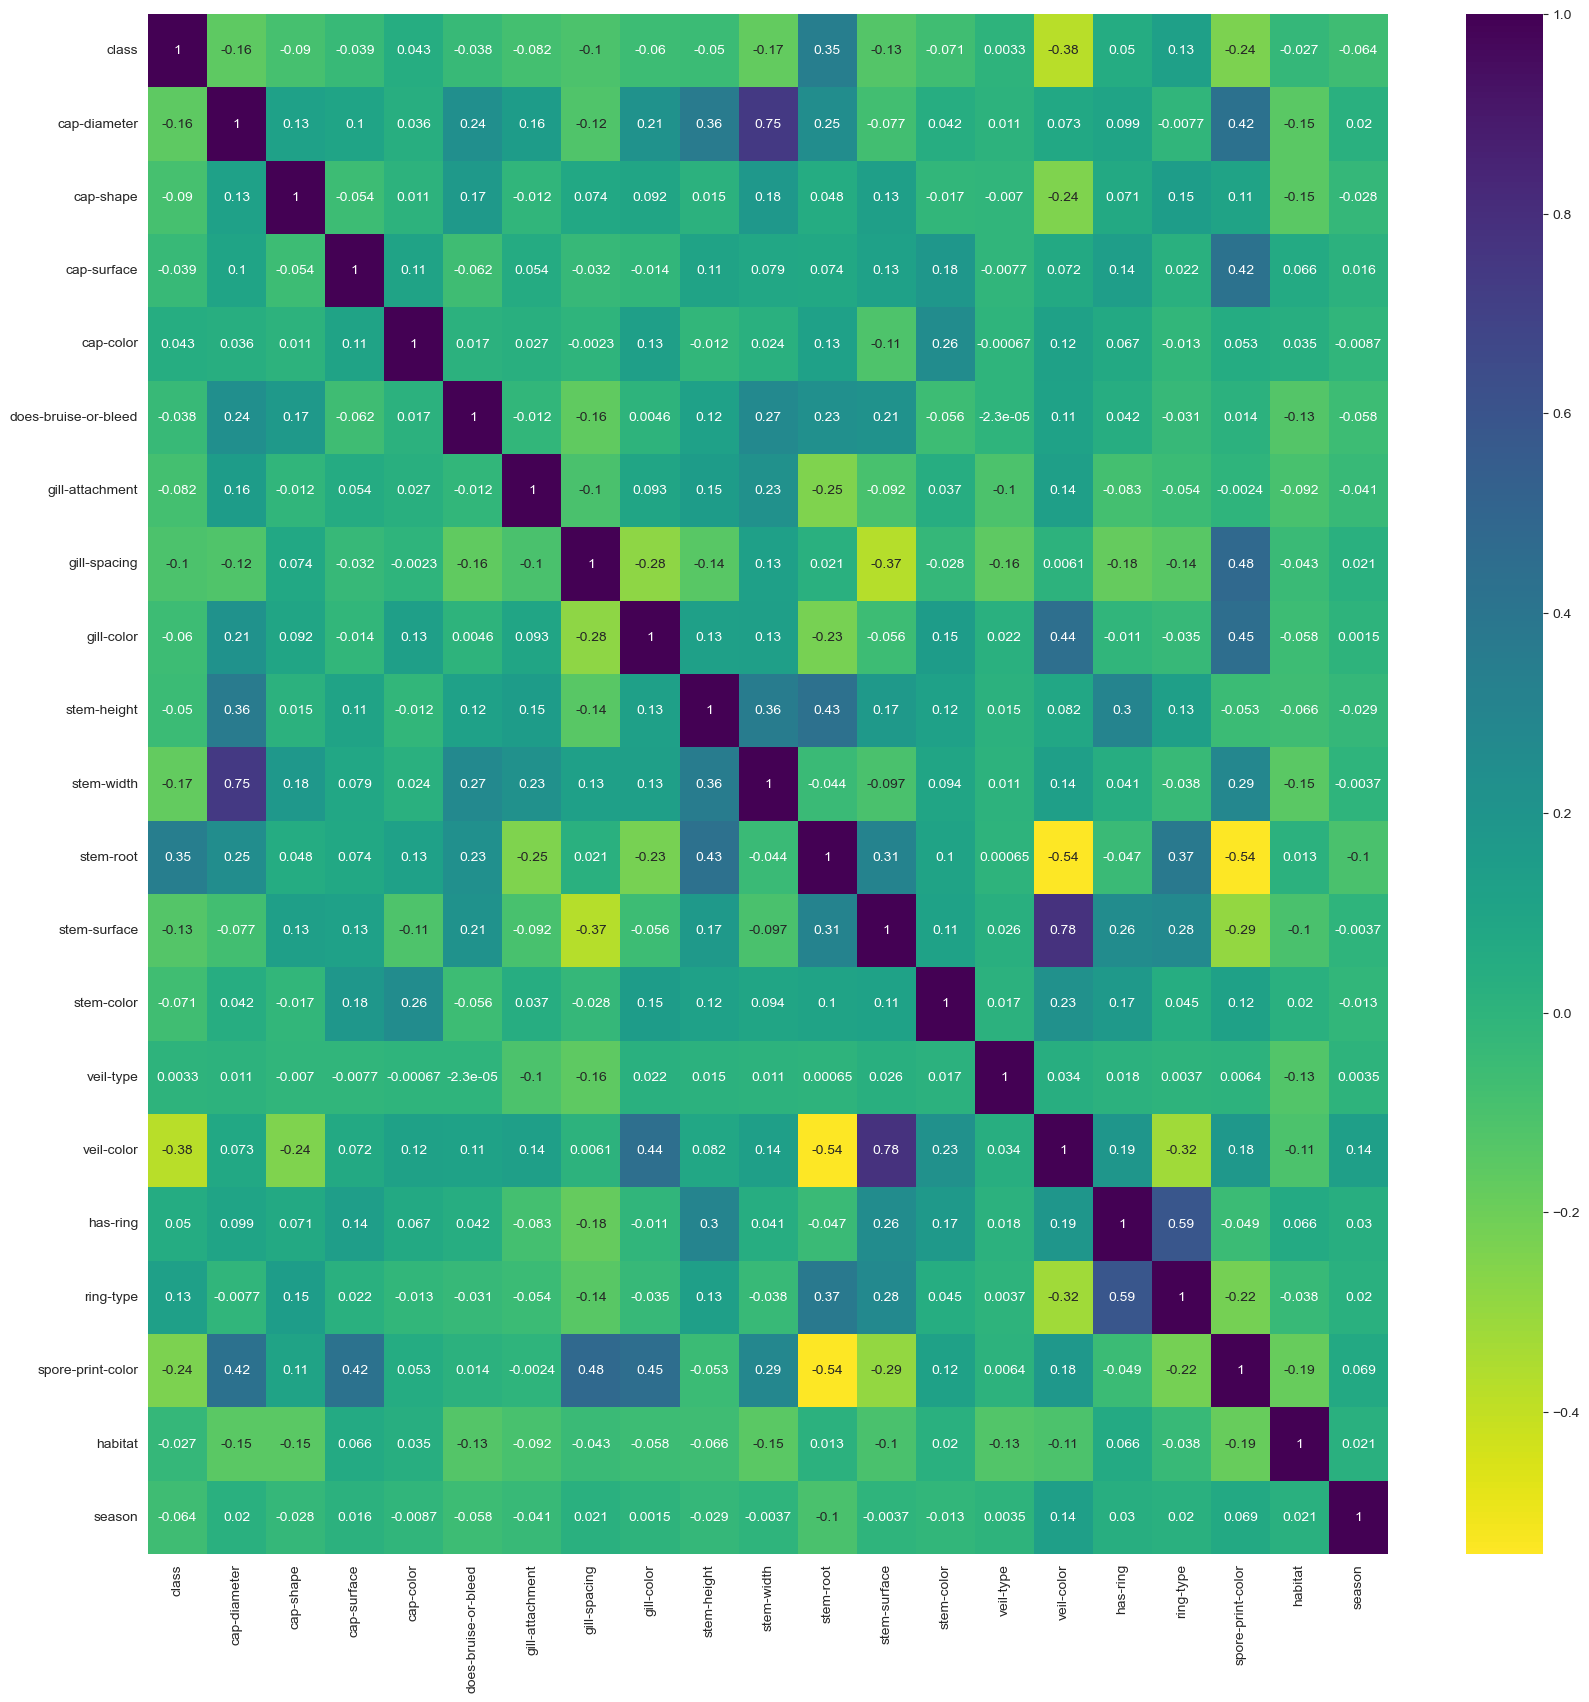

In [59]:
# matrix = df_2.copy()
plt.figure(figsize=(20,20))
temp= matrix
# temp=train.drop('id',axis=1)
temp=temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
sns.heatmap(temp.corr(),annot=True,cmap='viridis_r')
plt.show()

In [60]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Positive Correlations:
<li> 'stem-root' shows strong positive correlation with target class.
<li> 'stem-width' shows strong positive correlation with 'cap-diameter'.
<li> 'veil-color' shows strong positive correlation with 'stem-surface'.
<li> 'cap-diameter', 'stem-surface','stem-width', 'stem-root' and 'stem-height'  shows a moderate positive correlations with several features.
</ul>  
<ul>    
Negative Correlations:
<li> 'veil-color' and 'spore-print-color' shows strongly negative correlation with target class.
<li> Vehicle_Age and Policy_Sales_Channel  status have a moderate negative correlation with Response.
<li> Age status show  strongly negative correlation with Policy_Sales_Channel, Vehicle_Age and Previously_Insured.
</ul>  
</div>

 ### <a id="II.2.4"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.4 Missing values, categorical data transformation</p>

In [18]:
# standardizing the Missing Data with null values to make it easier to handle
train= train.fillna(np.nan)
test = test.fillna(np.nan)
df= df.fillna(np.nan)

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(18)

Total  Percent
veil-type          47467   94.934
spore-print-color  45711   91.422
stem-root          44162   88.324
veil-color         44022   88.044
stem-surface       31939   63.878
gill-spacing       20144   40.288
cap-surface        10812   21.624
gill-attachment     8471   16.942
ring-type           2043    4.086
stem-color             3    0.006
cap-shape              1    0.002
gill-color             1    0.002
has-ring               1    0.002
class                  0    0.000
habitat                0    0.000
stem-width             0    0.000
cap-diameter           0    0.000
stem-height            0    0.000

In [7]:
# drop columns with missing values > 65% 
def droping_columns(df):
    Missing = df.isna().mean()*100
    colums_to_drop = df.columns[Missing>65]
    df.drop(columns = colums_to_drop, inplace=True)
    return df
df=droping_columns(df)

In [8]:
def cleaning(df):
    threshold = 101   
    for i in df.select_dtypes(include=['category']).columns:
#         if df[i].dtype.name == 'category':
#             if 'missing' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('missing')
#             if 'noise' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('noise')
#         else:
#             df[i] = df[i].astype('category')
#             df[i] = df[i].cat.add_categories(['missing', 'noise'])
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.add_categories(['missing', 'noise'])        
#         df[i] = df[i].fillna('missing')
        df[i] = df[i].fillna(df[i].mode()[0])  
    
        count = df[i].value_counts(dropna=False)
        less_freq = count[count < threshold].index
        
        df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)   
    return df

df = cleaning(df)
test = cleaning(test)

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
We encounter a challenge: some categories don't show up very often in our data. This makes it hard to work with them. To fix this, we'll group these rare categories together into a new category called "Unknown". 
</ul>  
</div>

In [9]:
def dataset_stabilizer(data):
    for col in data.select_dtypes(exclude=['number']).columns:
        data[col] = data[col].fillna(data[col].mode()[0])
     
    for col in data.select_dtypes(include=['number']).columns:
        data[col] = data[col].fillna(data[col].mean())       
    return data
# df = dataset_stabilizer(df)

In [ ]:
# Imput missing numerical
imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=['number']).columns
imputed_data = imputer.fit_transform(df[numeric_cols])
train_imputed = pd.DataFrame(imputed_data, columns=numeric_cols)
# train_imputed['sii'] = train_imputed['sii'].round().astype(int)
for col in df.columns:
    if col not in numeric_cols:
        train_imputed[col] = df[col]       
df = train_imputed

### <a id="II.2.5"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5 Distribution of attributes with fewer than 10 unique values</p>

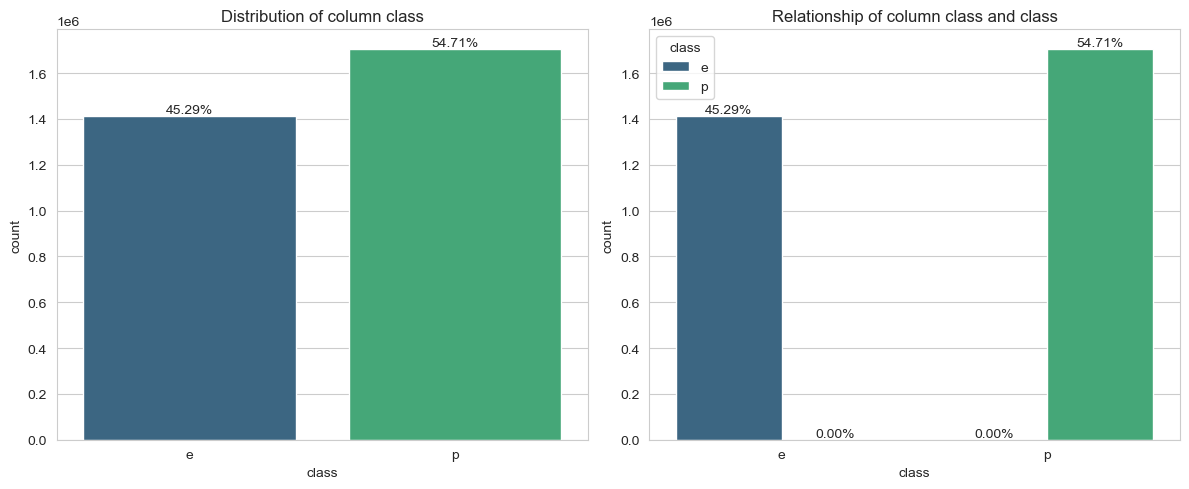

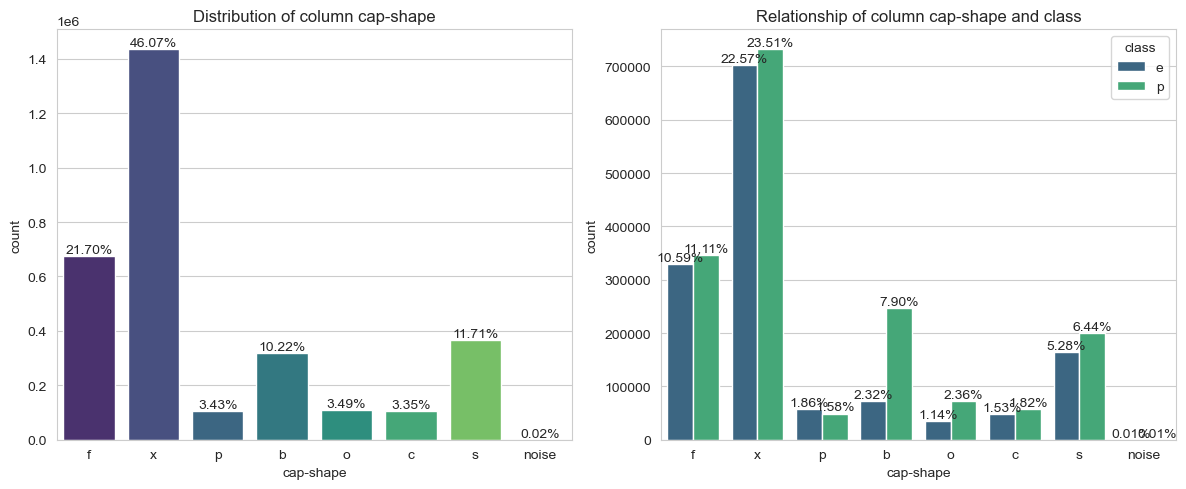

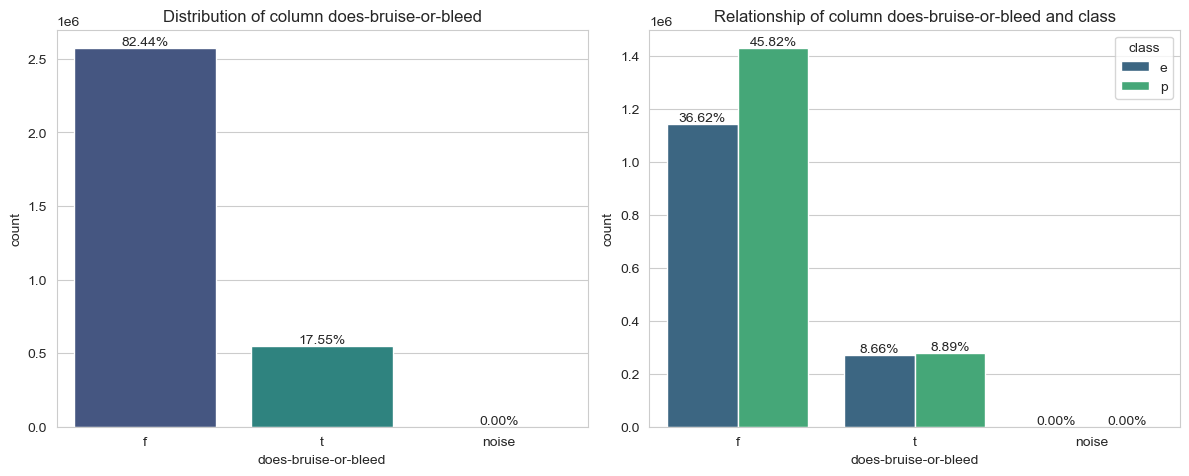

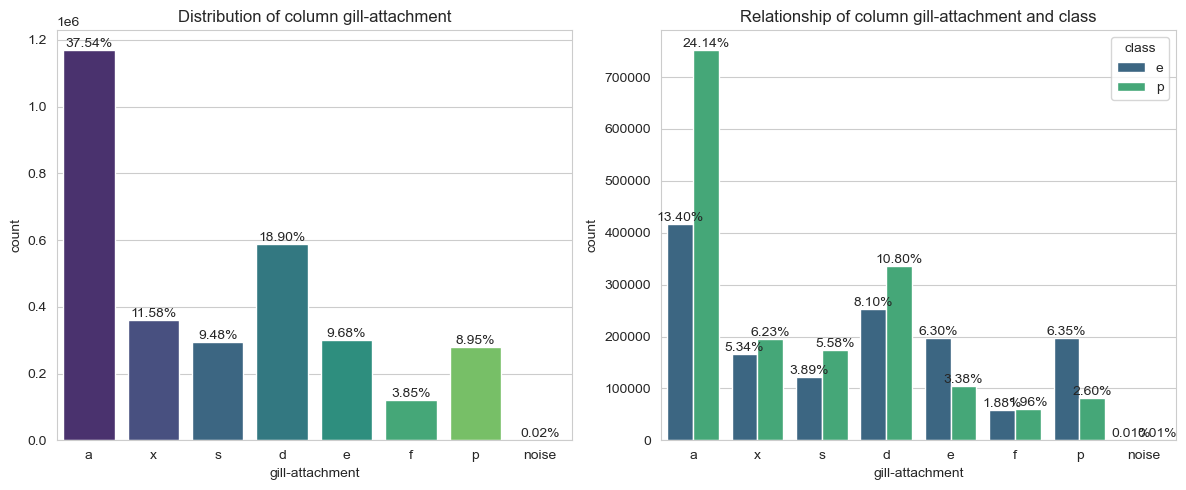

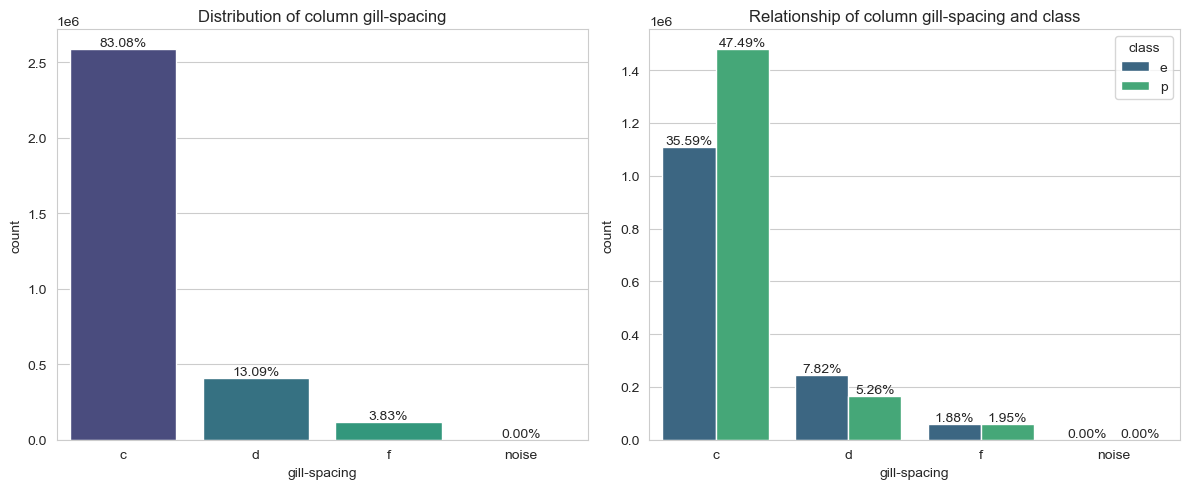

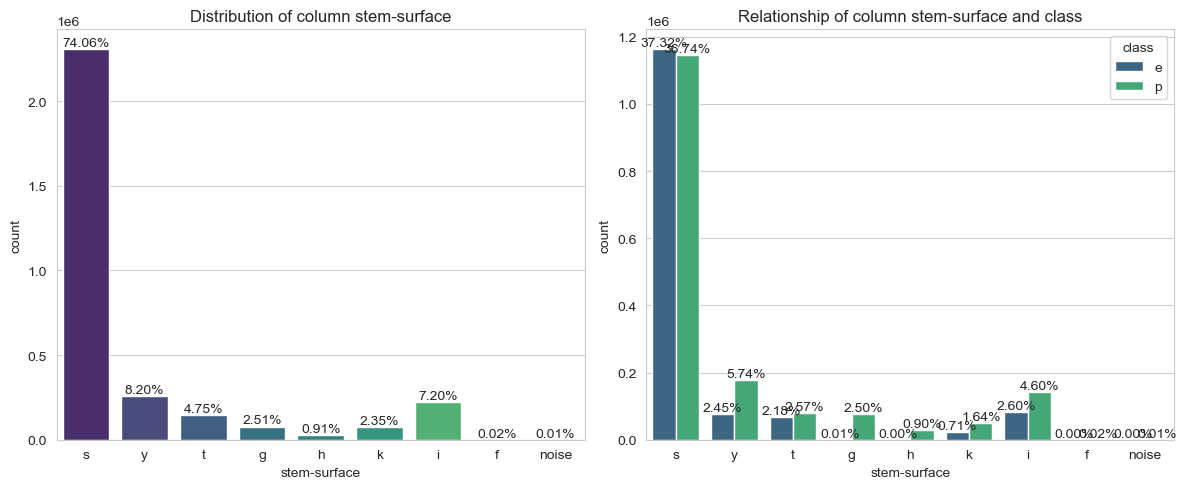

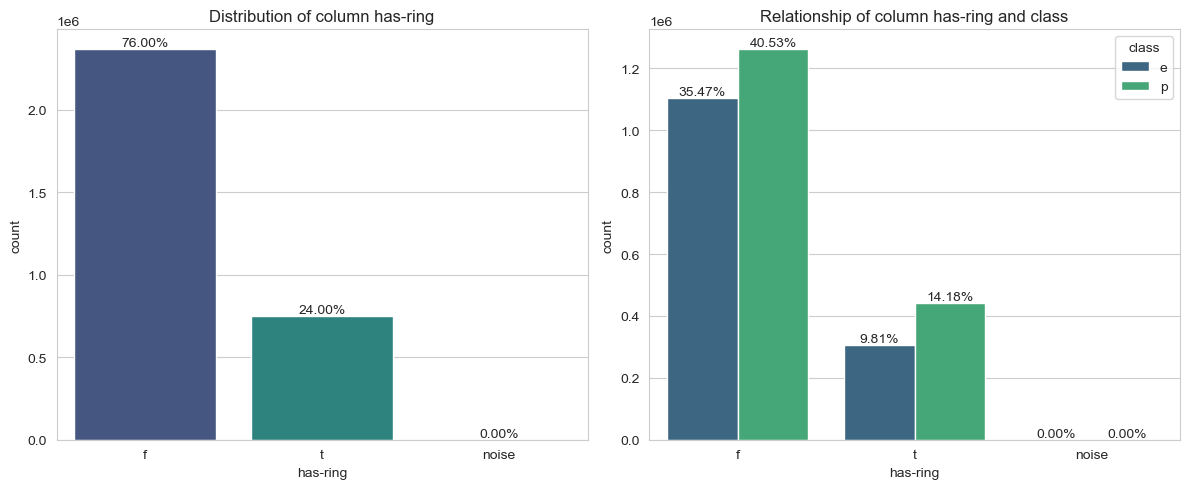

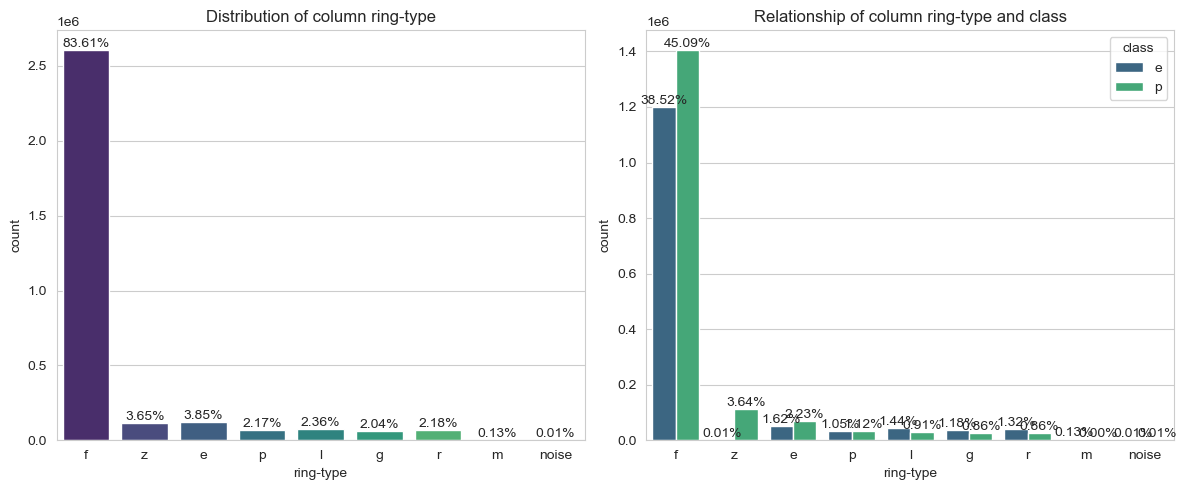

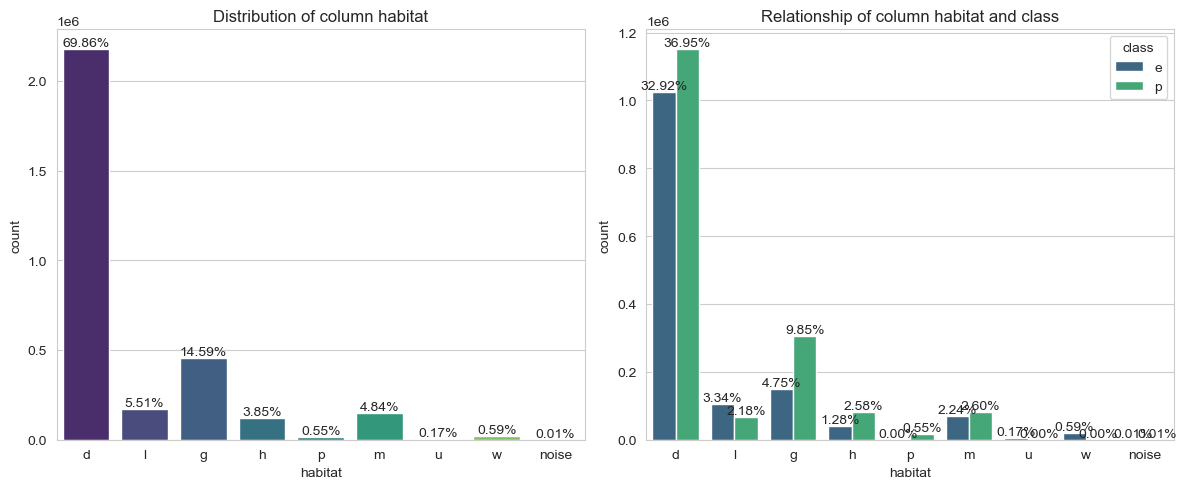

In [137]:
# Identify columns with fewer than 10 unique values
less = [col for col in df.columns if df[col].nunique() < 10]

for i in less[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotting the first countplot
    sns.countplot(x=i, data=df, ax=ax[0], palette='viridis')
    ax[0].set_title(f'Distribution of column {i}')
    
    # Adding percentages on top of the bars for the first countplot
    total = len(df)
    for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30 
        ax[0].annotate(percentage, (x, y), ha='center', va='bottom')

    # Plotting the second countplot with hue='Response'
    sns.countplot(x=i, data=df, hue='class', ax=ax[1], palette='viridis')
    ax[1].set_title(f'Relationship of column {i} and class')
    
    # Adding percentages on top of the bars for the second countplot
    for p in ax[1].patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax[1].patches if p.get_x() == p.get_x()])  # Total height for this x value
        percentage = f'{100 * height / total:.2f}%' if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30
        ax[1].annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Distribution target class is almost equal.
<li> Cap-shape: although most of b and o type is poisoning.
<li> Distribution is very unbalanced: 'does-bruise-or-bleed', 'ring-type', 'habitat'.
<li> Gil-spacing: although most of s type is poisoning. For d type most is eating.
</ul>
</div>

### <a id="II.2.6"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.6 Distribution of numerical features</p>

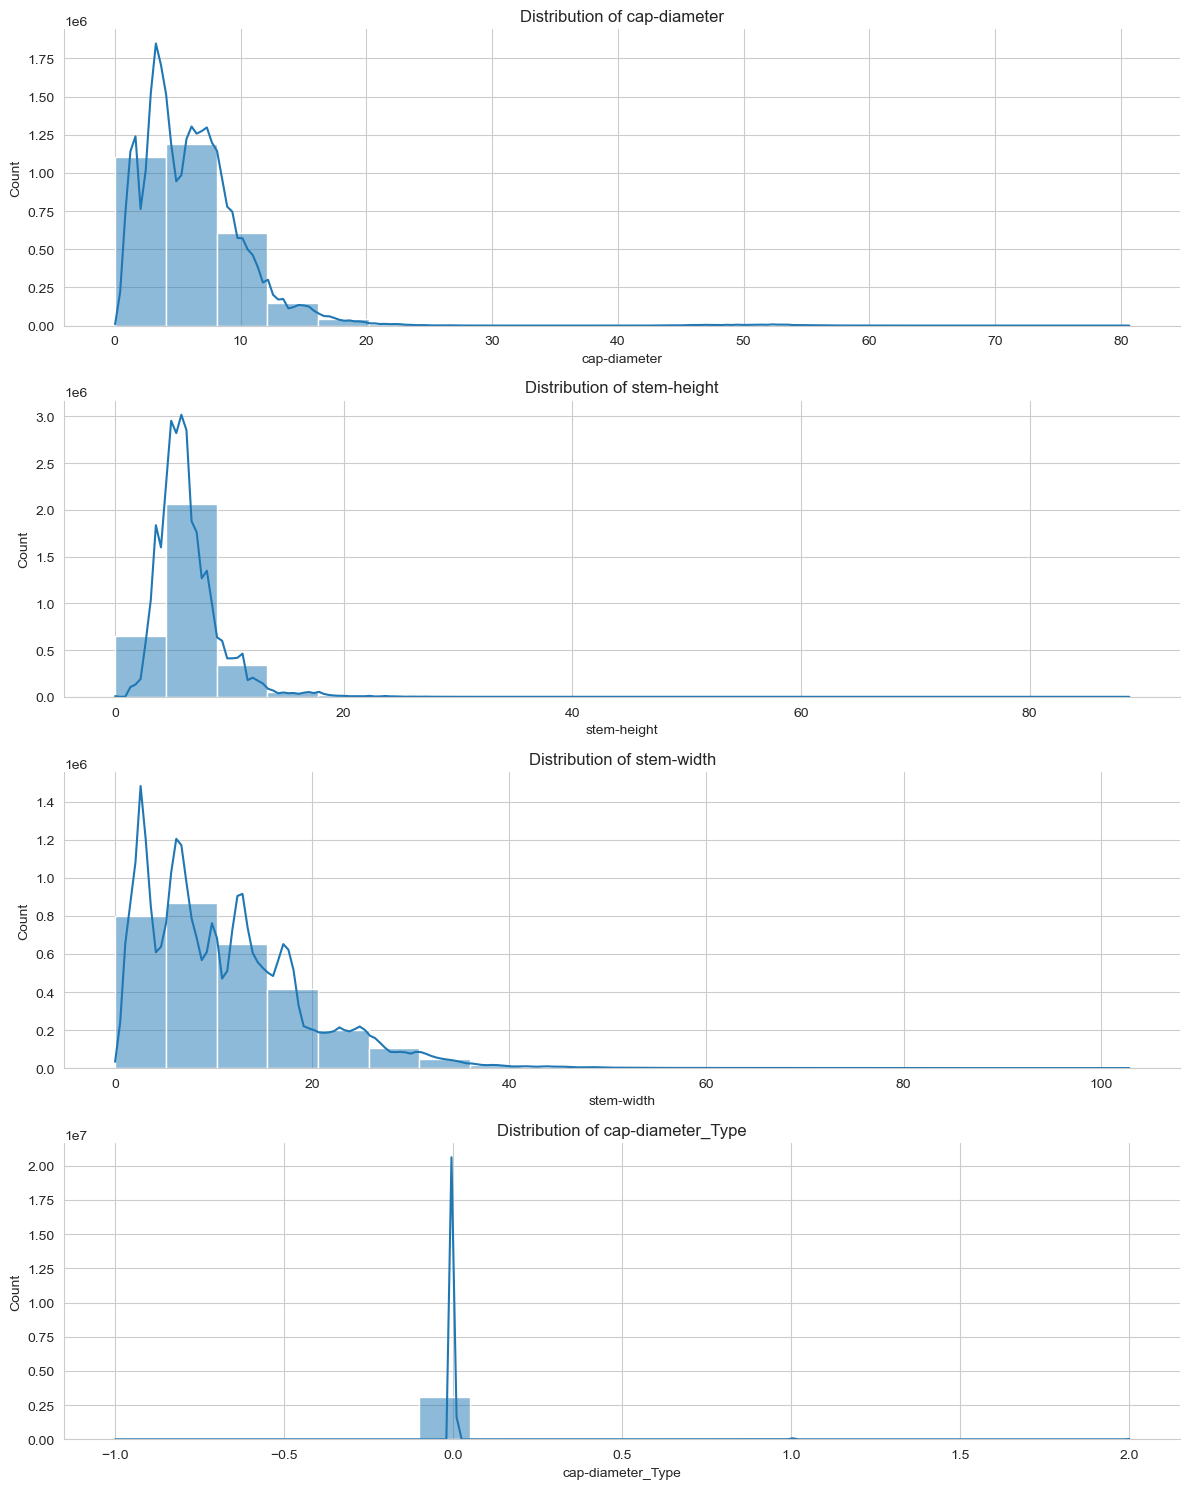

In [92]:
numerical_features_DF = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 15))  

for i, column in enumerate(numerical_features_DF, 1):
    plt.subplot(len(numerical_features_DF), 1, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)
    sns.despine()
    plt.title(f'Distribution of {column}')


plt.tight_layout()  
plt.show()

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> The distribution of our numerical columns is right-skewed with outliers, meaning that most values are concentrated on the left side of the distribution, but there are some unusually high values (outliers) that are far away from the rest. This suggests that our data may not be normally distributed, which could impact our analysis and modeling results.
</ul>
</div>

### <a id="II.2.6.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.6.1 Distribution of 'cap-diameter'</p>

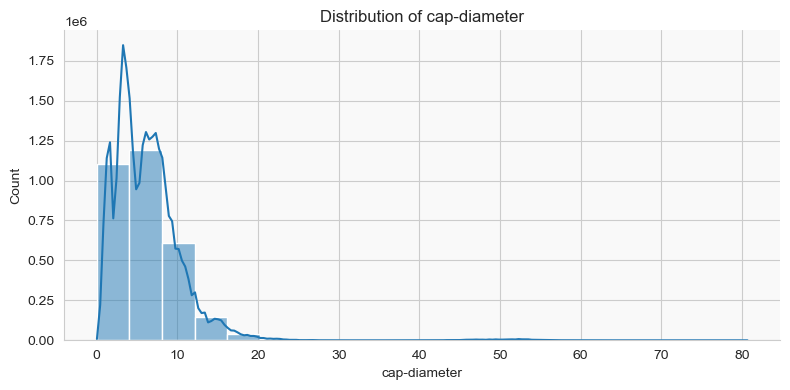

In [101]:
background_color = '#f9f9f9'
sns.set_style("whitegrid", {"axes.facecolor": background_color})

plt.figure(figsize=(8, 4))  
sns.histplot(df['cap-diameter'], bins=20, kde=True,   linewidth=1)
sns.despine()
plt.title(f'Distribution of cap-diameter')
plt.tight_layout()
plt.show()

### <a id="II.2.6.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.6.2 Distribution of 'stem-height'</p>

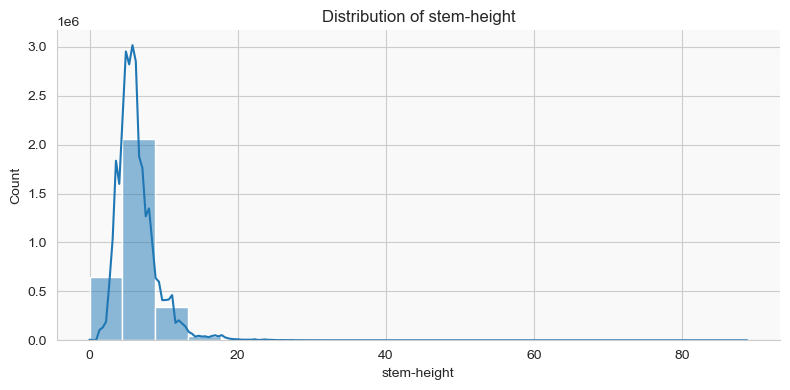

In [103]:
background_color = '#f9f9f9'
sns.set_style("whitegrid", {"axes.facecolor": background_color})

plt.figure(figsize=(8, 4))  
sns.histplot(df['stem-height'], bins=20, kde=True,   linewidth=1)
sns.despine()
plt.title(f'Distribution of stem-height')
plt.tight_layout()
plt.show()

### <a id="II.2.6.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.6.3 Distribution of 'stem-width'</p>

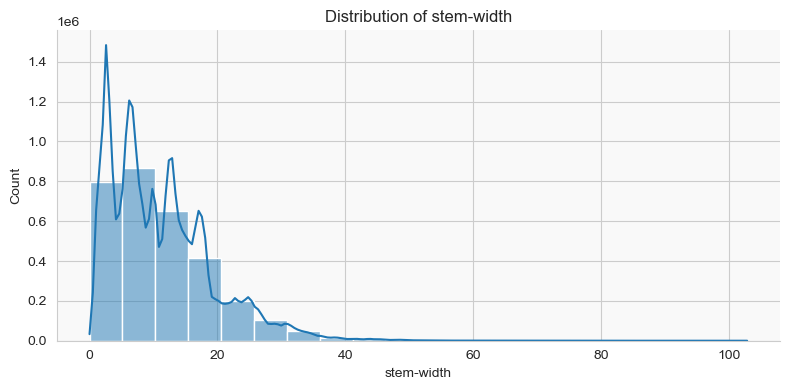

In [106]:
background_color = '#f9f9f9'
sns.set_style("whitegrid", {"axes.facecolor": background_color})

plt.figure(figsize=(8, 4))  
sns.histplot(df['stem-width'], bins=20, kde=True,   linewidth=1)
sns.despine()
plt.title(f'Distribution of stem-width')
plt.tight_layout()
plt.show()

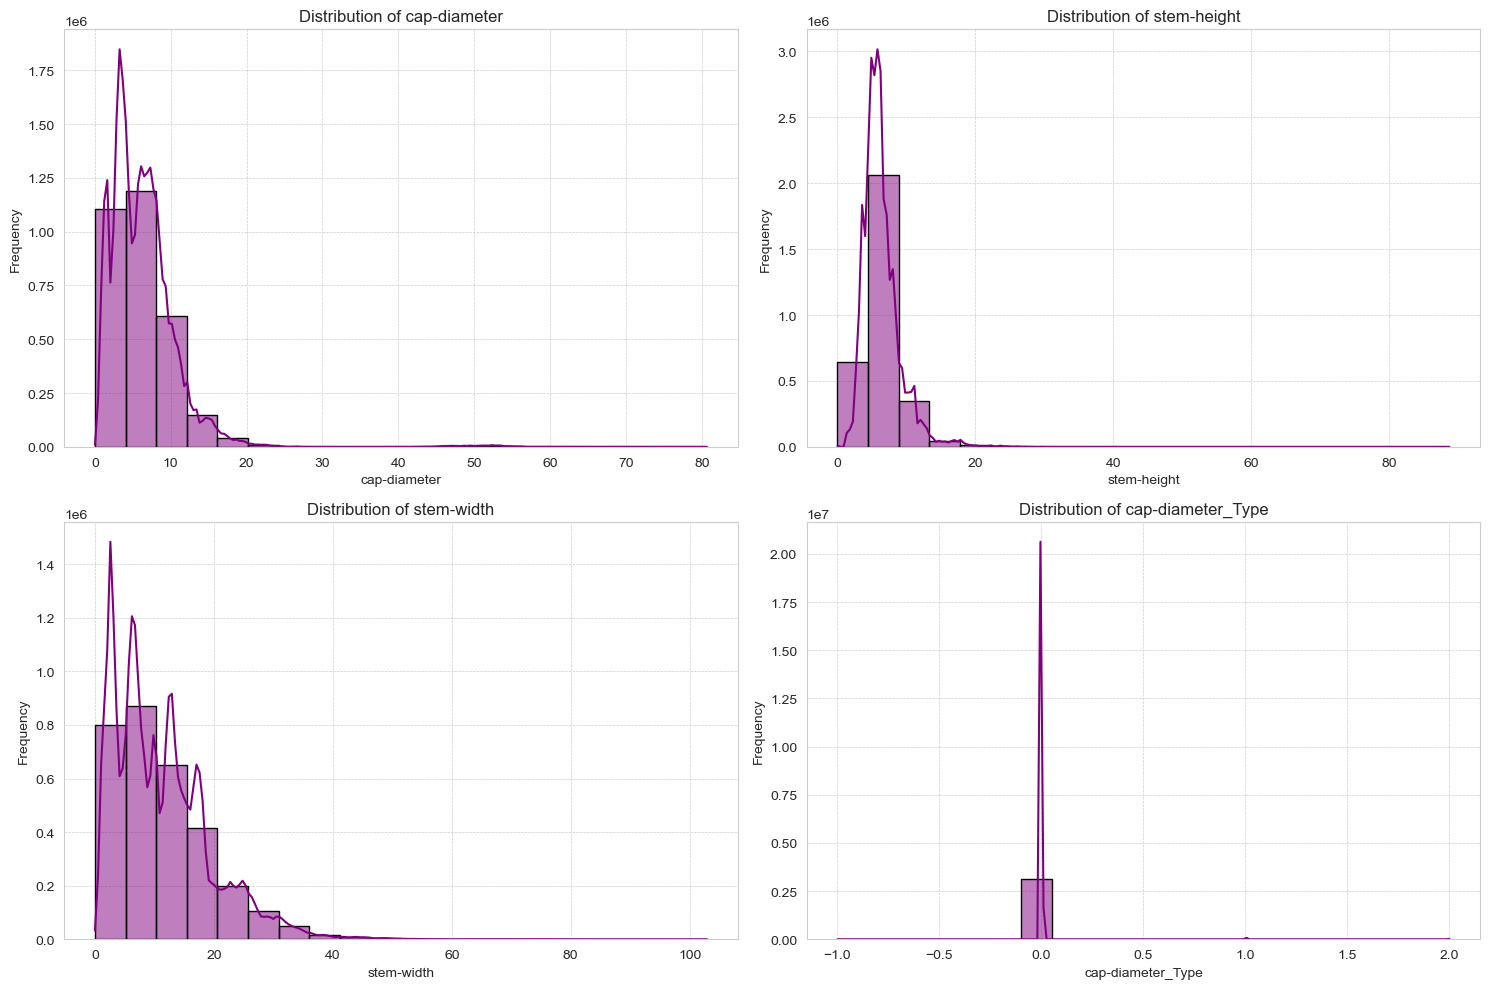

In [87]:
def plot_numeric_distribution(df_train):
    # Define all numeric columns to plot
    numeric_columns  = df.select_dtypes(include=['number']).columns
    
    # Adjust layout parameters
    background_color = '#ffffff'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    # Plot each numeric column
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], color='Purple', edgecolor='black', linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_distribution(df)

### <a id="II.2.7"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.7 Distribution of categorical features</p>

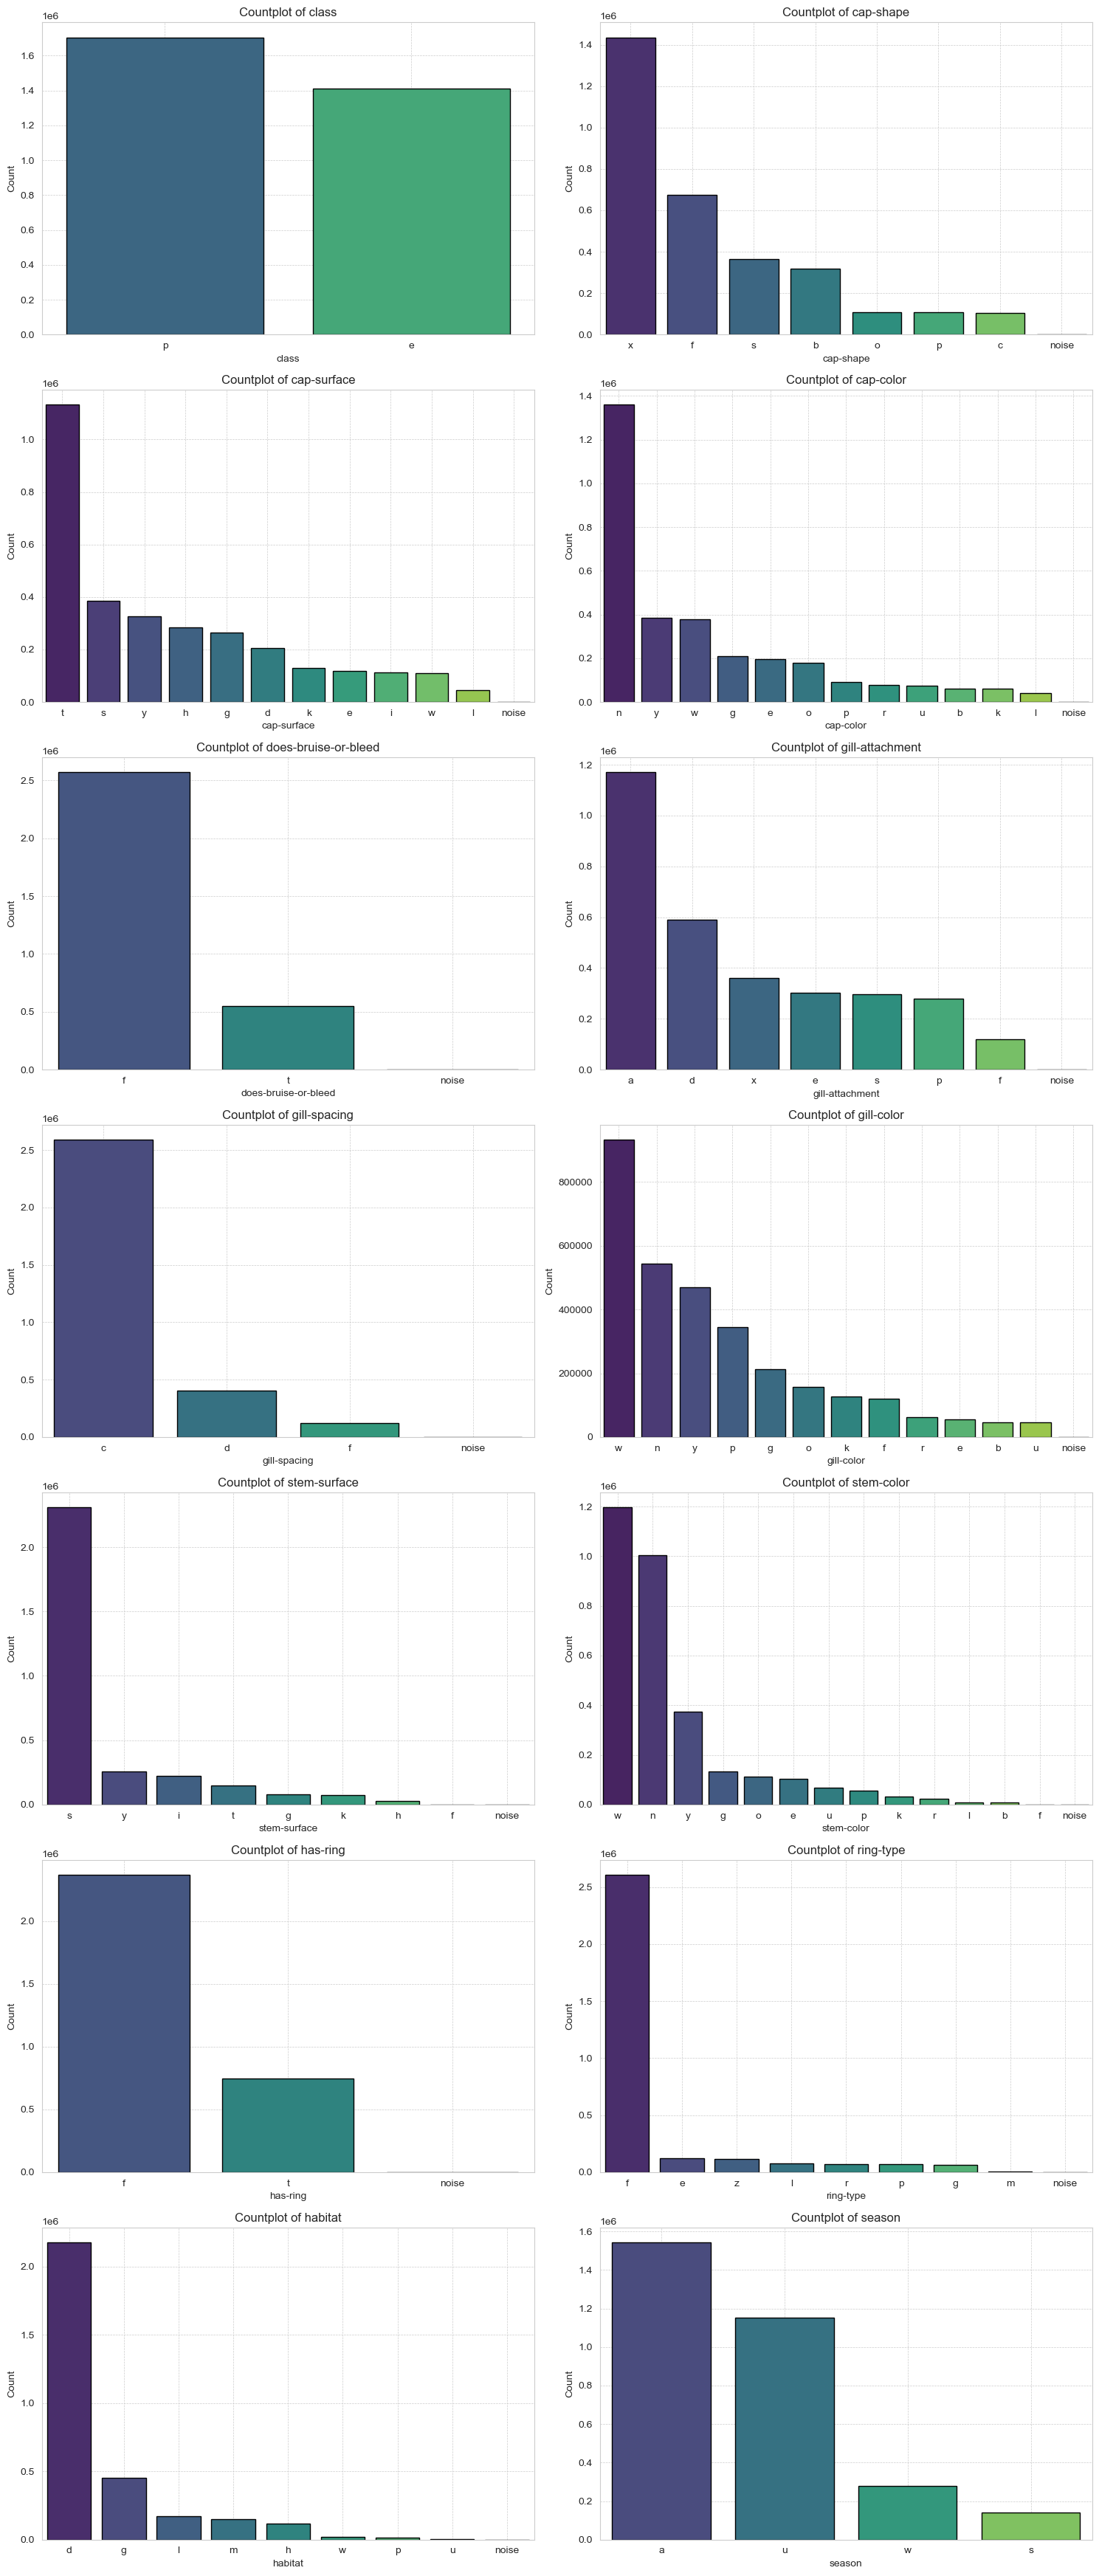

In [139]:
def plot_categorical_countplots(df):
    # Select categorical columns
    categorical_columns =  df.select_dtypes(exclude=['number']).columns
    
    background_color = '#ffffff'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(categorical_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(categorical_columns):
        p = sns.countplot(x=col, data=df, palette='viridis', edgecolor='black', linewidth=1, ax=axs[i], order=df[col].value_counts().index)
        p.set_title(f"Countplot of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Count")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_categorical_countplots(df)

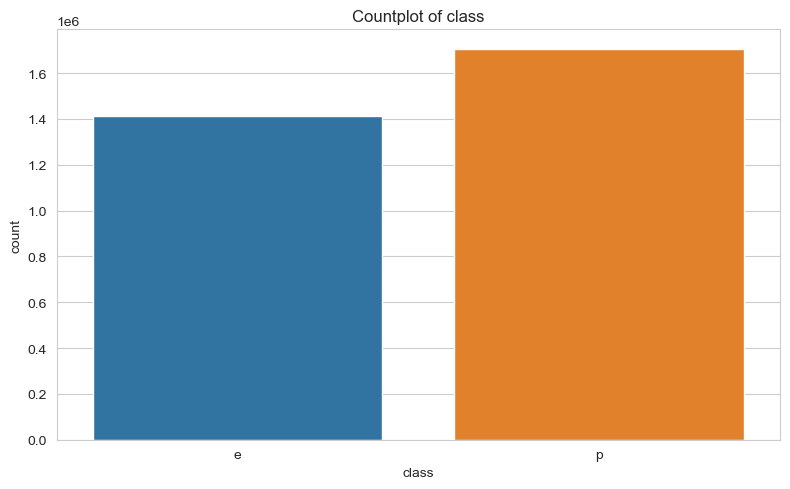

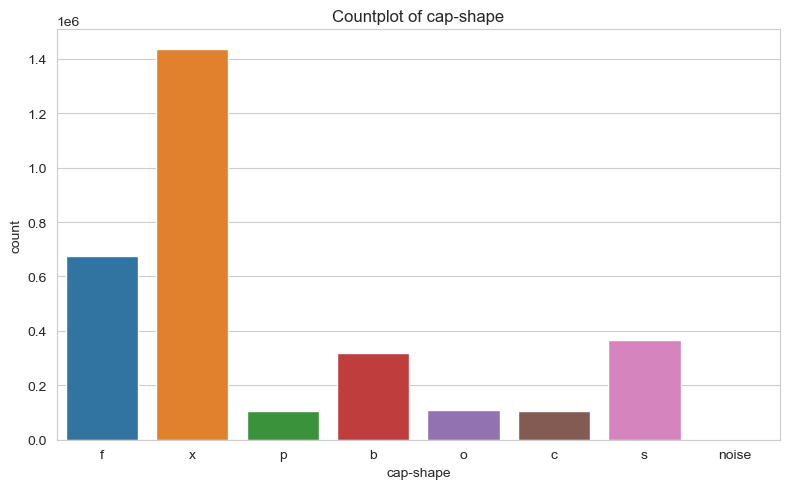

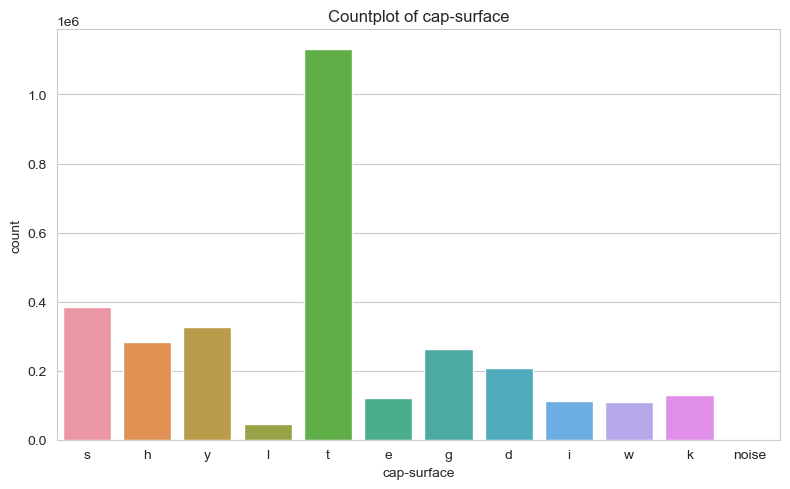

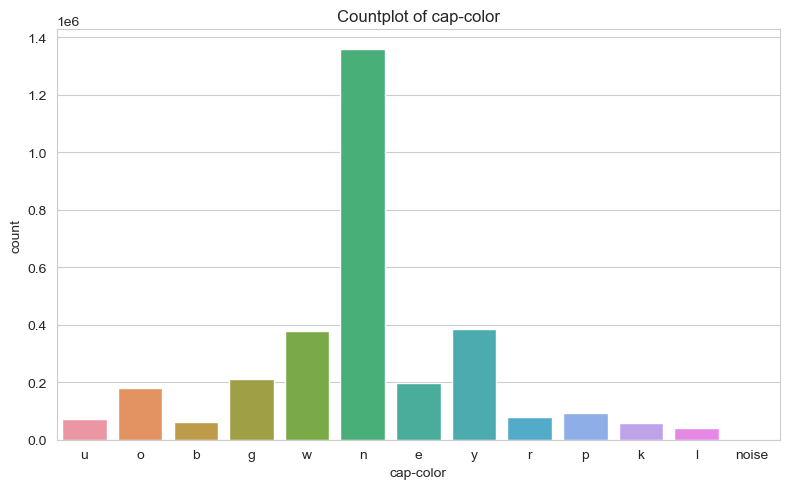

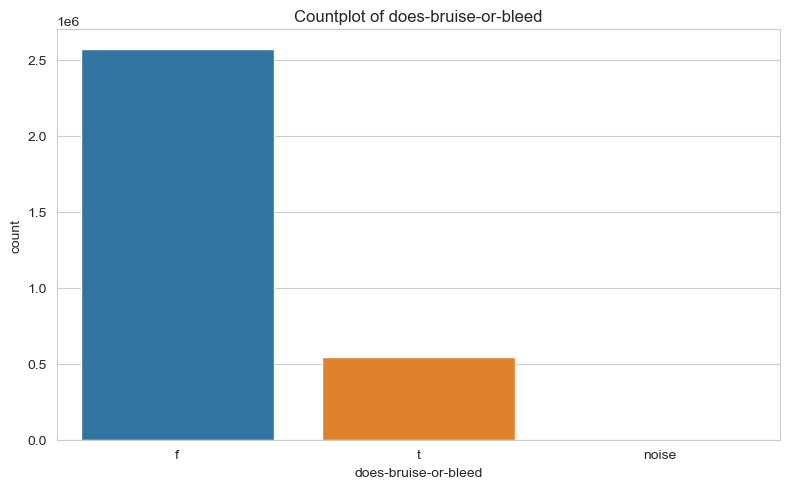

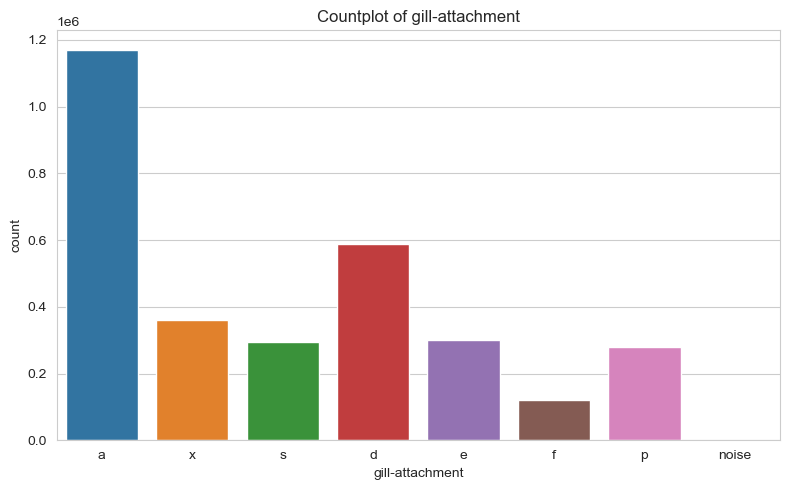

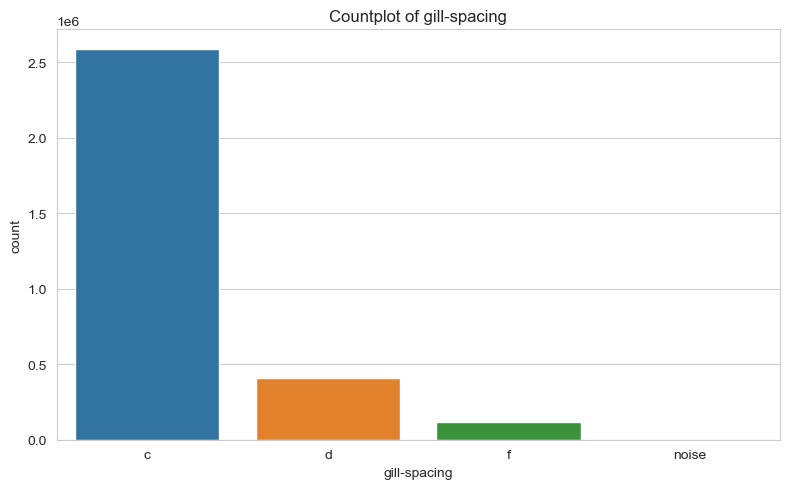

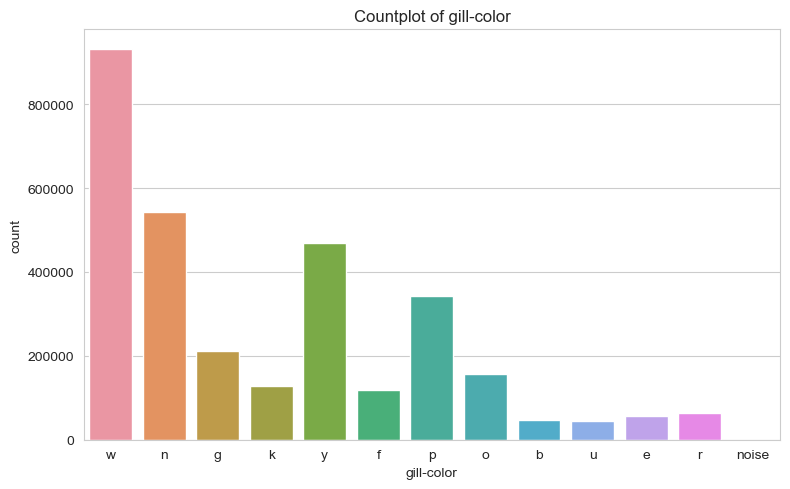

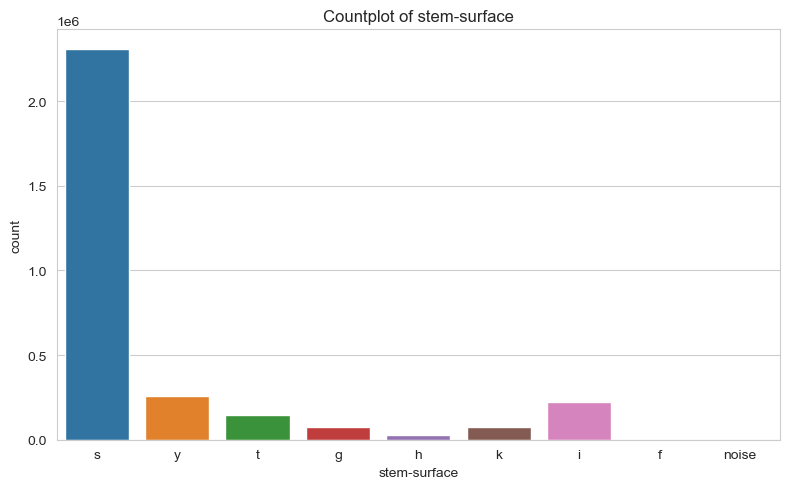

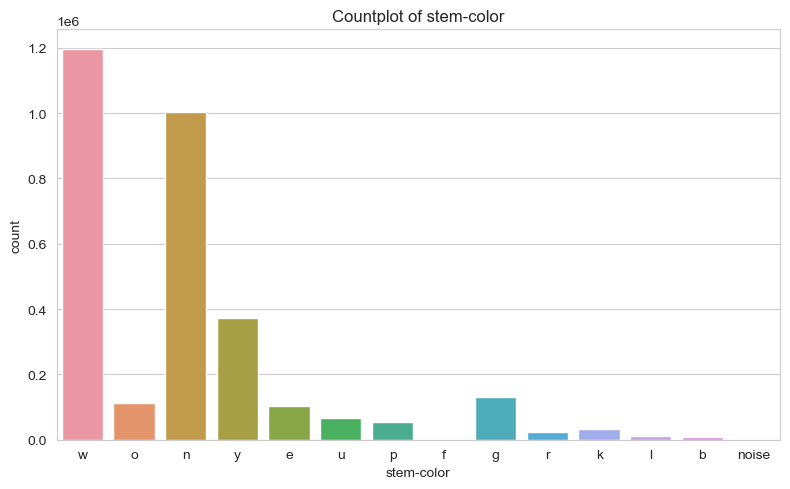

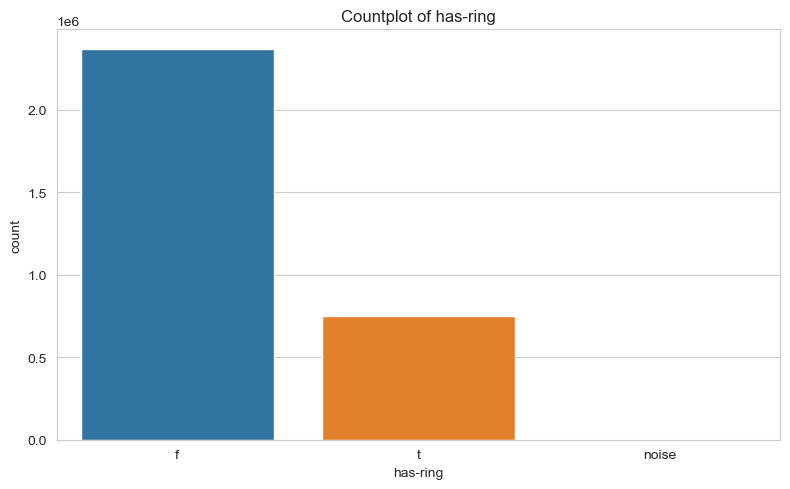

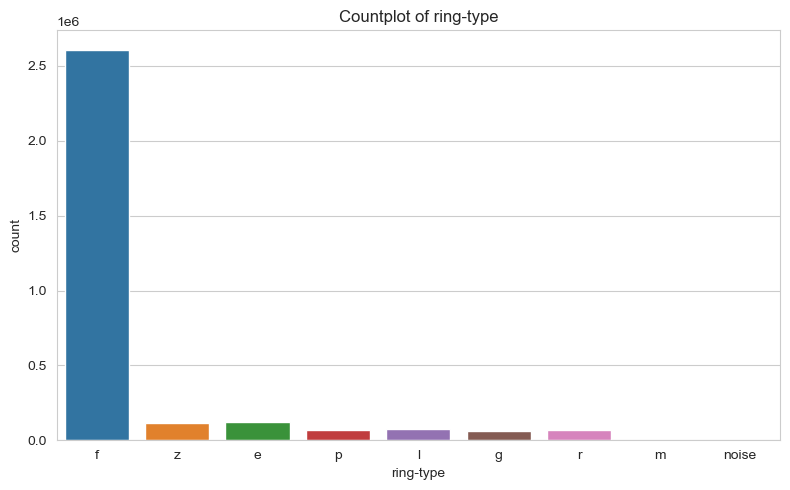

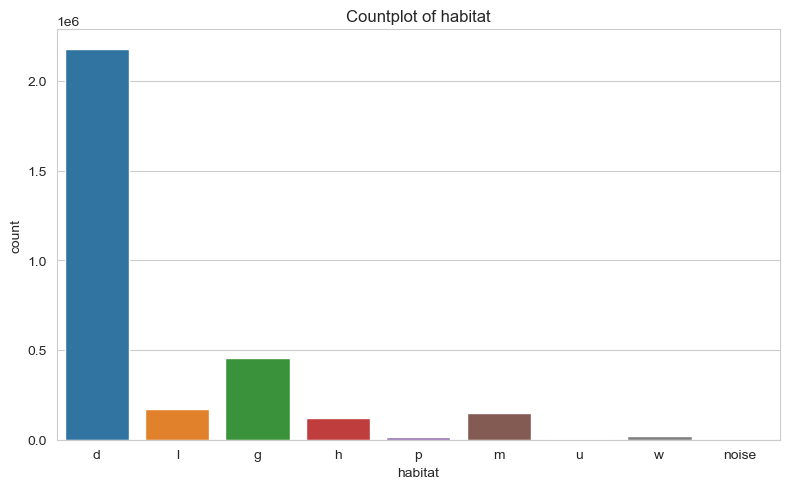

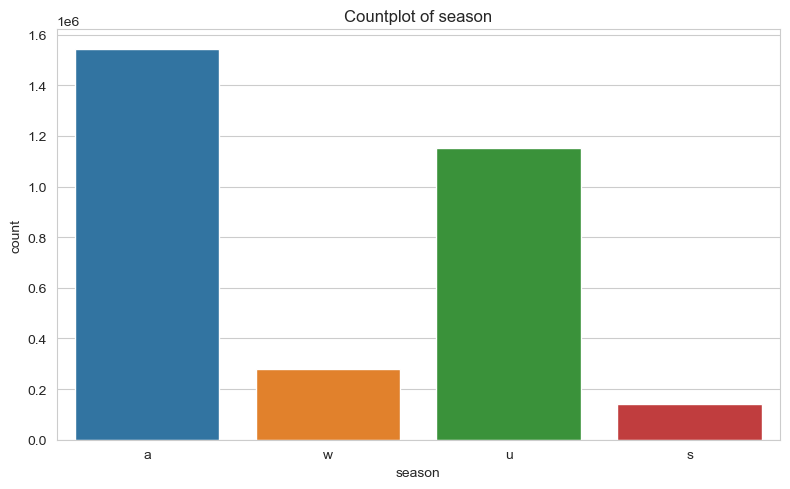

In [140]:
# Plot countplots for each categorical column, excluding "Unknown" values
categorical_columns =  df.select_dtypes(exclude=['number']).columns

for column in categorical_columns:
    # Exclude "Unknown" values from the DataFrame
#     filtered_data = df.loc[df[column] != 'Unknown']
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

### <a id="II.2.8"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.8 Distribution of target class in season</p>

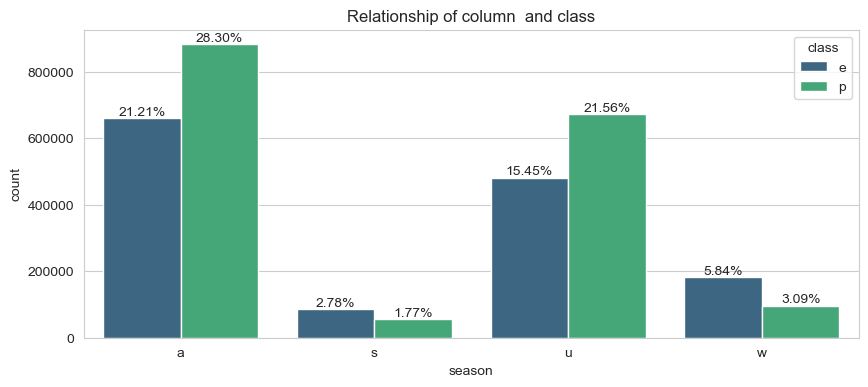

In [138]:
plt.figure(figsize=(10, 4))

pl =sns.countplot(x=train['season'], data=train, hue='class', palette='viridis')
pl.set_title(f'Relationship of column  and class')

# Adding percentages on top of the bars for the second countplot
for p in pl.patches:
    height = p.get_height()
    total = sum([p.get_height() for p in pl.patches if p.get_x() == p.get_x()])  # Total height for this x value
    percentage = f'{100 * height / total:.2f}%' if total > 0 else '0%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 30
    pl.annotate(percentage, (x, y), ha='center', va='bottom')

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion:
<li> There are most mushrooms in spring and autumn.
<li> Only in winter more mushrooms is eating than poisoning.
</ul>
</div>

### <a id="II.2.9"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.9 Correlations between Numerical Features</p>

In [38]:
# label_encoder = LabelEncoder()
# df_numeric = label_encoder.fit_transform(df_numeric['class'])

In [42]:
label = LabelEncoder()
train['class'] =label.fit_transform(train['class'])

In [52]:
train=pd.read_csv('train.csv')

In [53]:
df= train.copy()

In [54]:
df = df.set_index('id')

In [55]:
yy=df['class'].copy()

In [56]:
yy=pd.DataFrame(yy)

In [58]:
numeric  = df.select_dtypes(include=['number'])
numeric

cap-diameter  stem-height  stem-width
id                                            
0               8.800        4.510      15.390
1               4.510        4.790       6.480
2               6.940        6.850       9.930
3               3.880        4.160       6.530
4               5.850        3.370       8.360
...               ...          ...         ...
3116940         9.290       12.140      18.810
3116941        10.880        6.650      26.970
3116942         7.820        9.510      11.060
3116943         9.450        9.130      17.770
3116944         3.200        2.820       7.790

[3116945 rows x 3 columns]

In [59]:
df_numeric = numeric.merge(yy, how='left', on='id')

In [60]:
df_numeric

cap-diameter  stem-height  stem-width class
id                                                  
0               8.800        4.510      15.390     e
1               4.510        4.790       6.480     p
2               6.940        6.850       9.930     e
3               3.880        4.160       6.530     e
4               5.850        3.370       8.360     e
...               ...          ...         ...   ...
3116940         9.290       12.140      18.810     e
3116941        10.880        6.650      26.970     e
3116942         7.820        9.510      11.060     p
3116943         9.450        9.130      17.770     e
3116944         3.200        2.820       7.790     p

[3116945 rows x 4 columns]

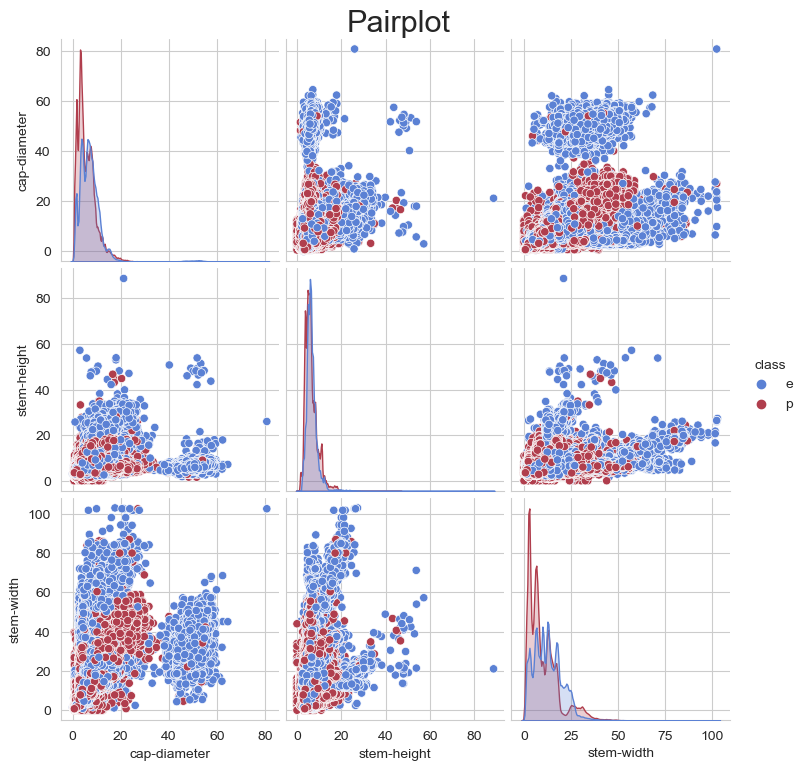

In [61]:
custom_palette = sns.color_palette(["#5b81d4", "#b03e4d"])

pairplot = sns.pairplot(df_numeric, hue='class', palette=custom_palette)
pairplot.figure.suptitle('Pairplot', fontsize=22, y=1.02)
plt.show()

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="III"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700">III <span style='color:#CDA63A'>|</span>DATA PRE-PROCESSING 🧪</div>

In [5]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 

In [11]:
X = train.drop(columns=['id','class']).copy()
y = train['class']
# X = train.copy()
# y = X.pop('Response')

### <a id="III.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.1 Target encoding</p>

In [12]:
label = LabelEncoder()
y=label.fit_transform(y)
y = y.astype('int16')
y

array([0, 1, 1, ..., 0, 0, 1], dtype=int16)

### <a id="III.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.2 Filling nulls</p>

In [13]:
# standardizing the Missing Data with null values to make it easier to handle
X= X.fillna(np.nan)
# test = test.fillna(np.nan)

In [ ]:
def dataset_stabilizer(data):
    for col in data.select_dtypes(exclude=['number']).columns:
        data[col] = data[col].fillna(data[col].mode()[0])
     
    for col in data.select_dtypes(include=['number']).columns:
        data[col] = data[col].fillna(data[col].mean())       
    return data
X = dataset_stabilizer(X)

### <a id="III.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.3 Removing duplicates and unnecessary columns</p>

In [49]:
print("There are {} duplicates in X dataset.".format(X.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(test.duplicated().sum()))

There are 5 duplicates in train dataset.
There are 0 duplicates in test dataset.


In [61]:
X.loc[X.duplicated()==True]

cap-diameter  cap-surface  cap-color  gill-color  stem-height  \
9353          0.147        0.182      1.000       0.417        0.000   
29462         0.184        0.182      1.000       0.417        0.000   
38349         0.160        0.182      0.417       0.417        0.000   
38917         0.133        0.182      1.000       0.417        0.000   
44736         0.166        0.182      0.417       0.417        0.000   

       stem-width  stem-color  cap-shape_b  cap-shape_c  cap-shape_f  \
9353        0.221       0.417        0.000        0.000        0.000   
29462       0.233       0.417        0.000        0.000        0.000   
38349       0.225       0.417        0.000        0.000        0.000   
38917       0.222       0.417        0.000        0.000        0.000   
44736       0.214       0.417        0.000        0.000        0.000   

       cap-shape_noise  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  \
9353             0.000        0.000        0.000        0.000        1.000   
29462            0.000        0.000        0.000        0.000        1.000   
38349            0.000        0.000        0.000        0.000        1.000   
38917            0.000        0.000        0.000        0.000        1.000   
44736            0.000        0.000        0.000        0.000        1.000   

       does-bruise-or-bleed_f  does-bruise-or-bleed_noise  \
9353                    1.000                       0.000   
29462                   1.000                       0.000   
38349                   1.000                       0.000   
38917                   1.000                       0.000   
44736                   1.000                       0.000   

       does-bruise-or-bleed_t  gill-attachment_a  gill-attachment_d  \
9353                    0.000              0.000              1.000   
29462                   0.000              0.000              1.000   
38349                   0.000              0.000              1.000   
38917                   0.000              0.000              1.000   
44736                   0.000              0.000              1.000   

       gill-attachment_e  gill-attachment_f  gill-attachment_noise  \
9353               0.000              0.000                  0.000   
29462              0.000              0.000                  0.000   
38349              0.000              0.000                  0.000   
38917              0.000              0.000                  0.000   
44736              0.000              0.000                  0.000   

       gill-attachment_p  gill-attachment_s  gill-attachment_x  \
9353               0.000              0.000              0.000   
29462              0.000              0.000              0.000   
38349              0.000              0.000              0.000   
38917              0.000              0.000              0.000   
44736              0.000              0.000              0.000   

       gill-spacing_c  gill-spacing_d  gill-spacing_f  gill-spacing_noise  \
9353            0.000           1.000           0.000               0.000   
29462           0.000           1.000           0.000               0.000   
38349           0.000           1.000           0.000               0.000   
38917           0.000           1.000           0.000               0.000   
44736           0.000           1.000           0.000               0.000   

       stem-surface_g  stem-surface_h  stem-surface_i  stem-surface_k  \
9353            0.000           0.000           0.000           0.000   
29462           0.000           0.000           0.000           0.000   
38349           0.000           0.000           0.000           0.000   
38917           0.000           0.000           0.000           0.000   
44736           0.000           0.000           0.000           0.000   

       stem-surface_noise  stem-surface_s  stem-surface_t  stem-surface_y  \
9353                0.000           1.000           0.000           0.000   
2946

In [14]:
# Drop columns with missing values > 85%
X=droping_columns(X)
# filling nulls
# X = dataset_stabilizer(X)
# Cleaning categorical data - transforming some categories don't show up very often in our data. This makes it hard to work with them. 
# To fix this, we'll group these rare categories together into a new category called "Unknown".
# X = cleaning(X)

### <a id="III.4"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.4 Aggregate categorical and numerical columns</p>

In [63]:
categorical_columns = X.select_dtypes(exclude=['number'])
categorical_columns.columns

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[50000 rows x 0 columns]

In [65]:
numerical_columns = X.select_dtypes(include=['number'])
numerical_columns.columns

Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_noise', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s',
       'cap-shape_x', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_noise',
       'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d',
       'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_noise',
       'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x',
       'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f',
       'gill-spacing_noise', 'stem-surface_g', 'stem-surface_h',
       'stem-surface_i', 'stem-surface_k', 'stem-surface_noise',
       'stem-surface_s', 'stem-surface_t', 'stem-surface_y', 'has-ring_f',
       'has-ring_t', 'ring-type_e', 'ring-type_f', 'ring-type_g',
       'ring-type_l', 'ring-type_noise', 'ring-type_p', 'ring-type_r',
       'ring-type_z', 'habitat_d', 'habitat_g', 'habitat_h', 'habitat

### <a id="III.5"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.5 Feature Engineering 👨‍🔬</p>

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
To maximize the accuracy of our predictions, we will replace all missing values in categorical columns with 'Unknown', allowing us to retain as many columns as possible for analysis.
</ul>
</div>

In [15]:
def cleaning(df):
    threshold = 101   
    for i in df.select_dtypes(include=['category']).columns:
#         if df[i].dtype.name == 'category':
#             if 'missing' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('missing')
#             if 'noise' not in df[i].cat.categories:
#                 df[i] = df[i].cat.add_categories('noise')
#         else:
#             df[i] = df[i].astype('category')
#             df[i] = df[i].cat.add_categories(['missing', 'noise'])
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.add_categories(['missing', 'noise'])        
#         df[i] = df[i].fillna('missing')
        df[i] = df[i].fillna(df[i].mode()[0])  
    
        count = df[i].value_counts(dropna=False)
        less_freq = count[count < threshold].index
        
        df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)   
    return df

X = cleaning(X)

 ### <a id="III.6"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.6 Convert types (downcasting)</p>

In [16]:
def convert_types (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    numerical_int = df.select_dtypes(include=['int64'])
    numerical_float = df.select_dtypes(include=['float64'])   
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df

X = convert_types(X)

In [ ]:
statistical_summary_categorical(X)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="IV"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700">IV <span style='color:#CDA63A'>|</span>DATA PROCESSING 🛠️</div>

In [32]:
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 

from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score, cohen_kappa_score, accuracy_score, adjusted_mutual_info_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, matthews_corrcoef, average_precision_score,f1_score
from collections import Counter
from yellowbrick.classifier import ROCAUC

import optuna
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor, VotingClassifier
from sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest, chi2, f_classif,f_regression, SelectFromModel, RFE, mutual_info_classif, SelectPercentile, mutual_info_regression
from sklearn.linear_model import Lasso
from boruta import BorutaPy

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import keras
from   keras import layers
import keras_tuner

 ### <a id="IV.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.1 Skewness of distributions 📉</p>

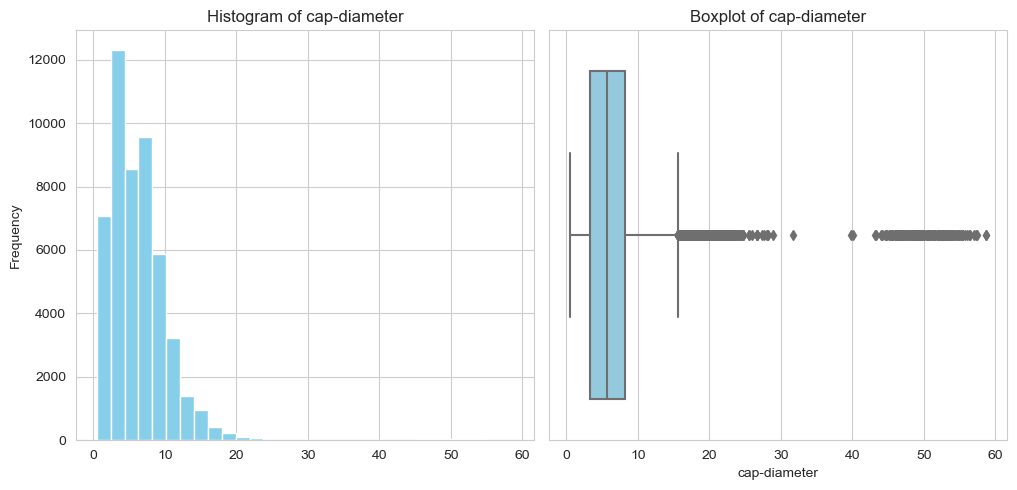

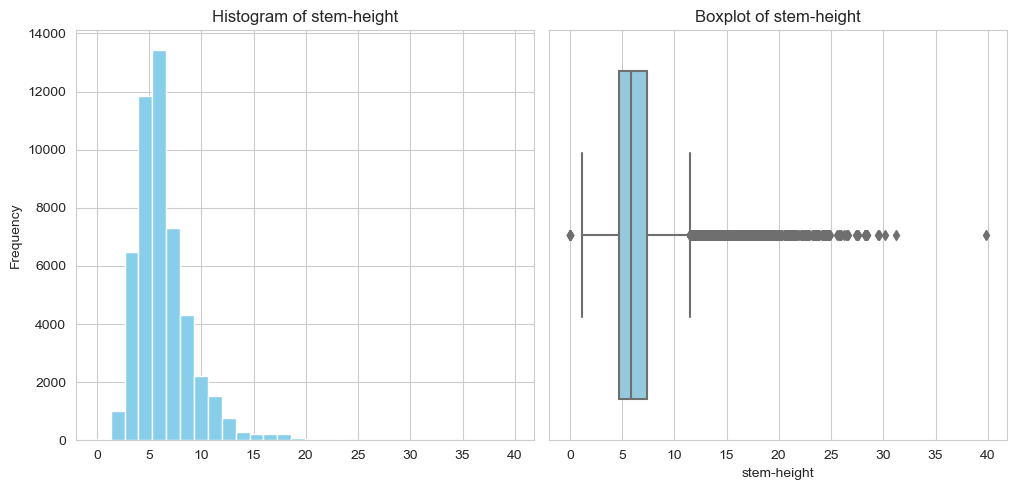

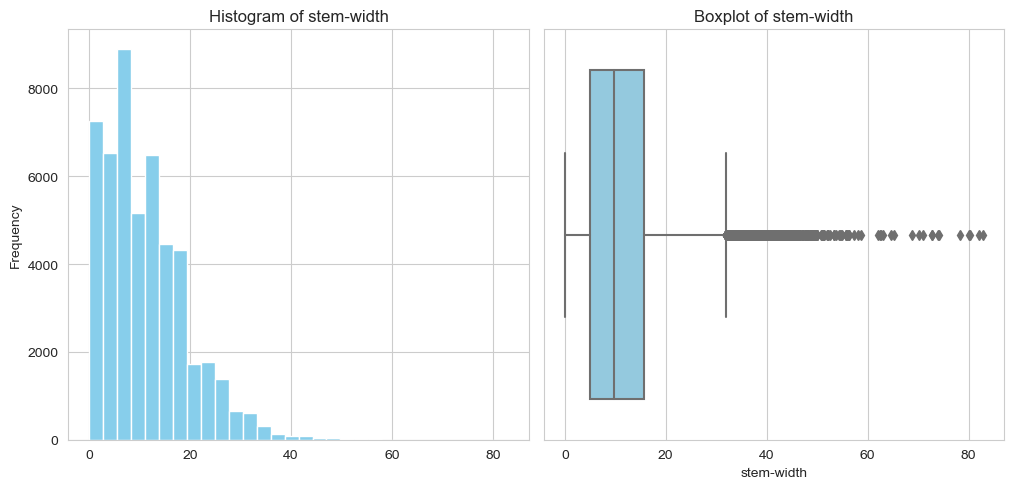

In [18]:
# numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
def plot_detect_outliers (columns=X.select_dtypes(include=['number']).columns.tolist()):
    for col in columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        X[col].plot.hist(bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=X[col],color='skyblue')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
        
plot_detect_outliers ()

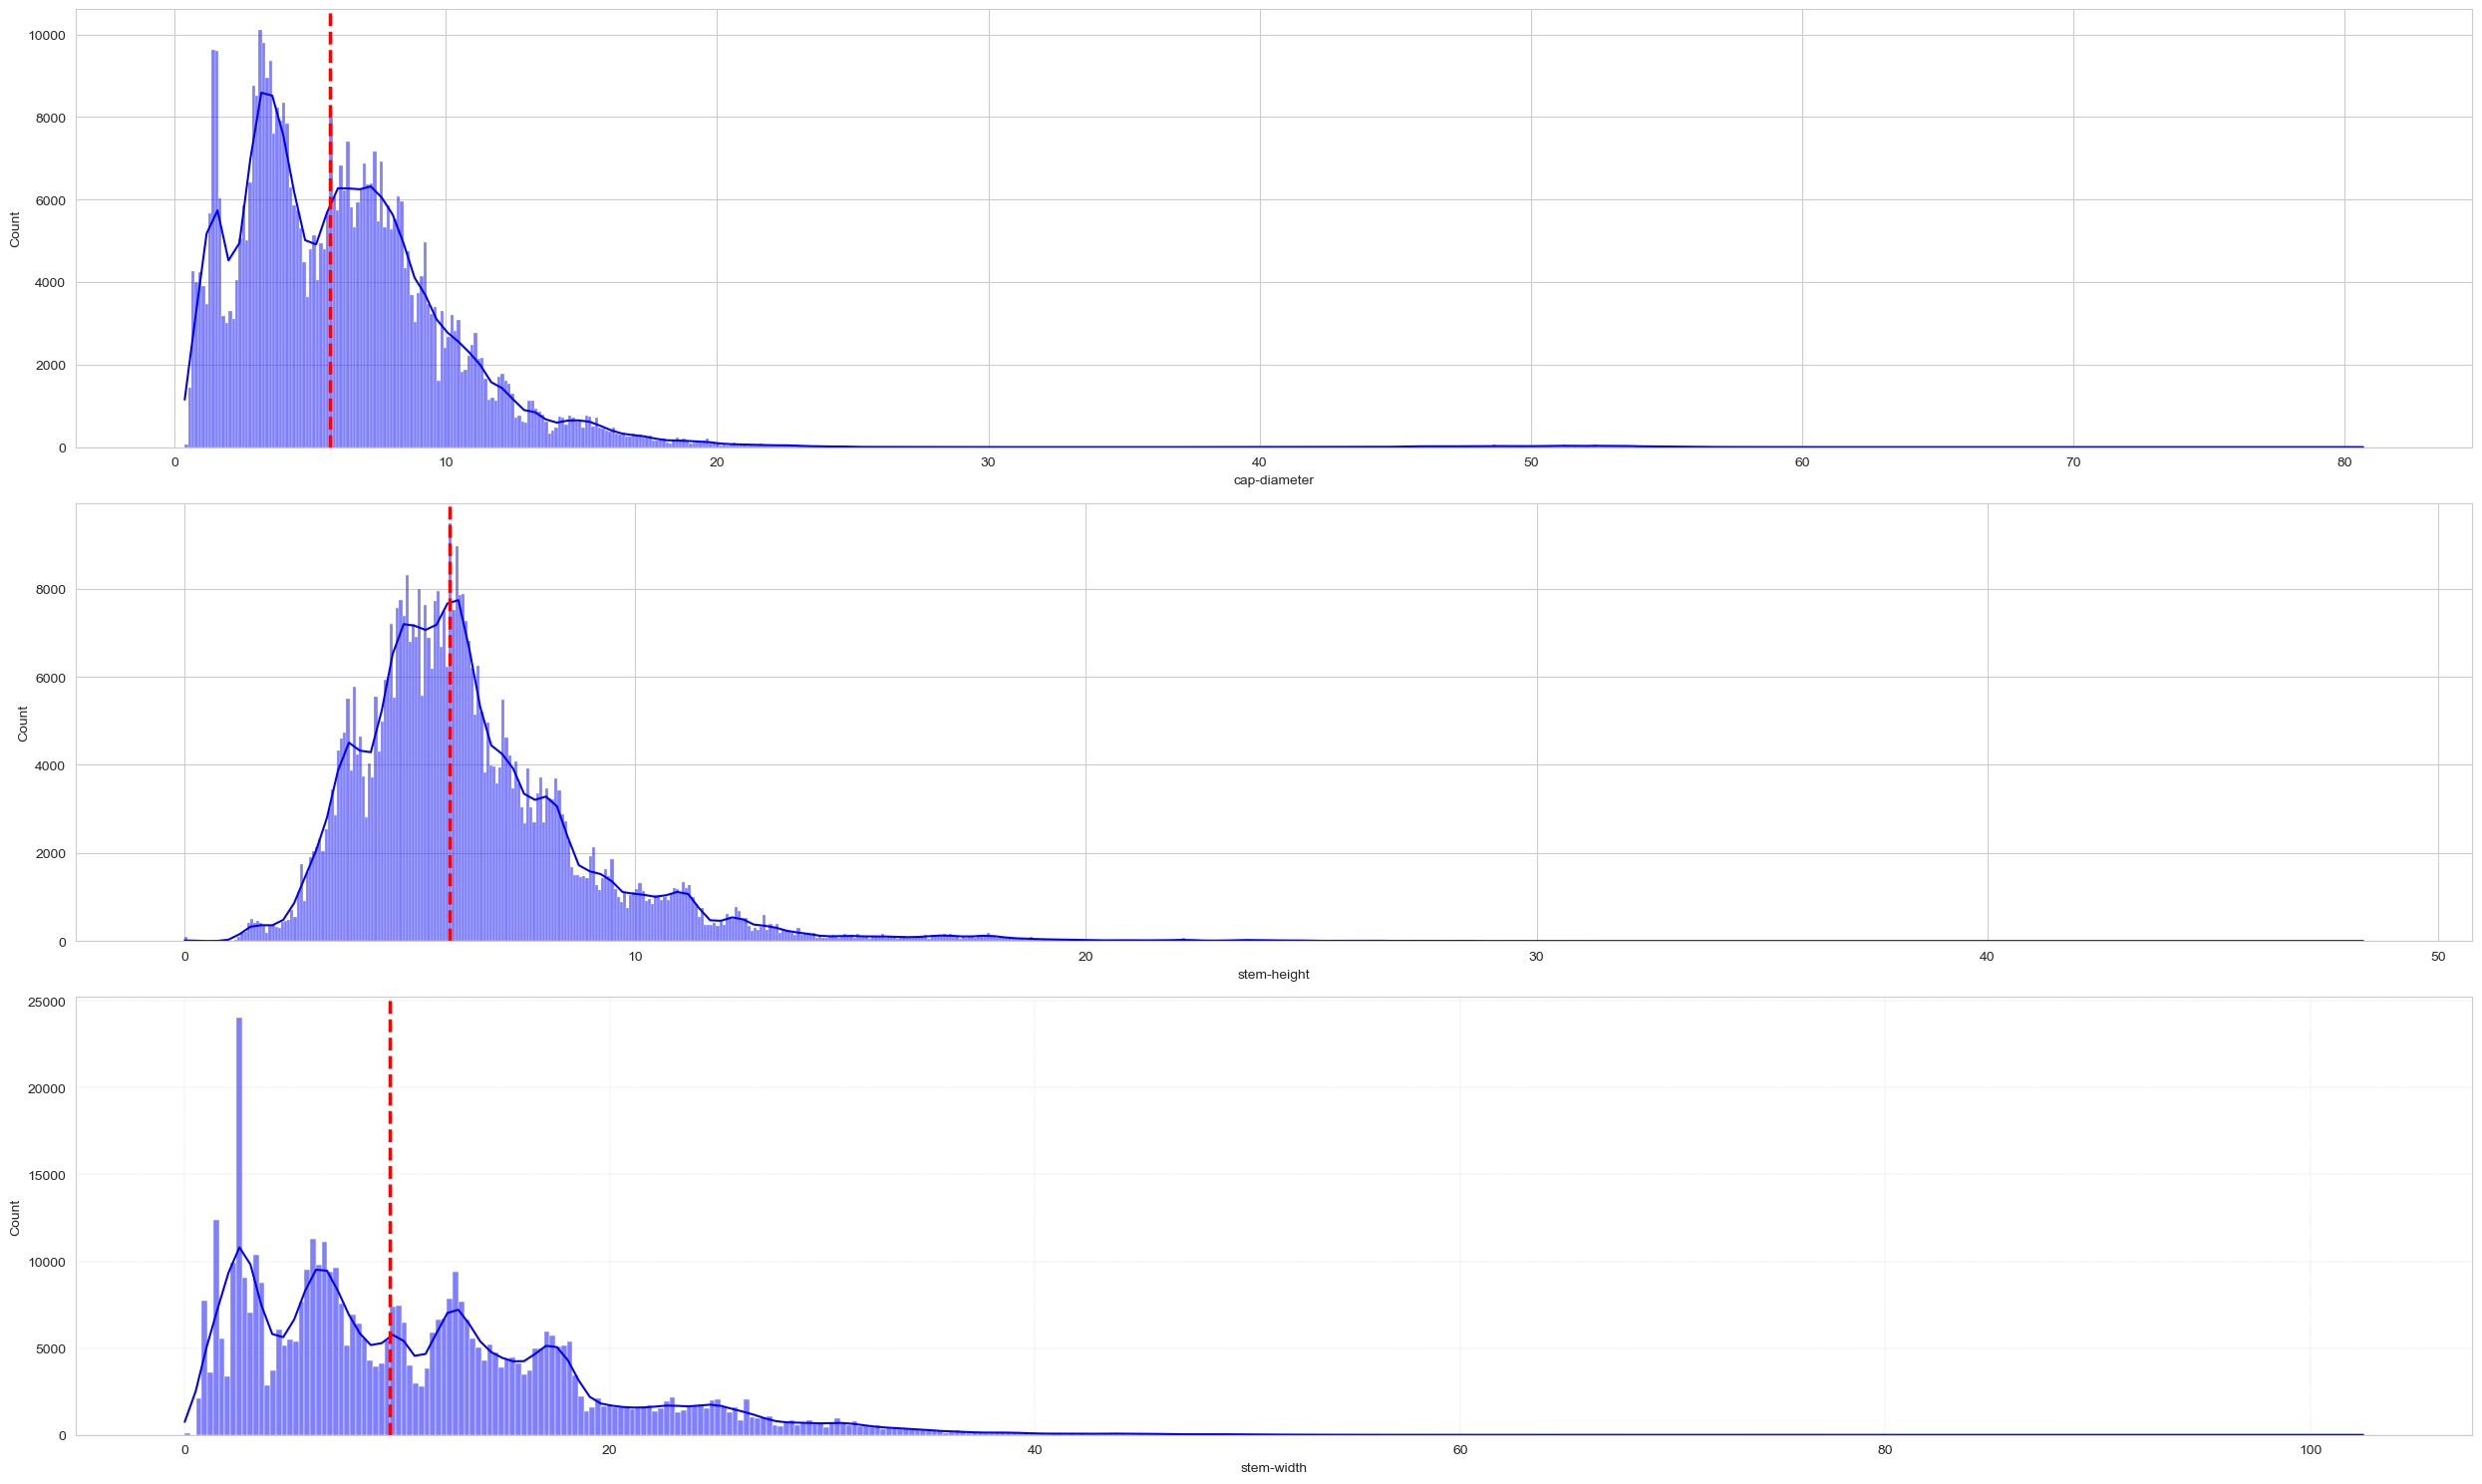

In [156]:
features = X.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(25, 15))
for i, col in enumerate(features):
    plt.subplot(3, 1, i+1) 
    sns.histplot(data=X, x=col,
                 kde=True,
                 color= 'blue'
                 )
    plt.axvline(x=X[col].median(),
            color='red',
            ls='--', 
            lw=2.5,
            )
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.25)
plt.show()

In [17]:
def get_skewed_features(df, skewed_threshold=0.75):
    numerical_features = df.select_dtypes(include=['number']).columns
    skewed = df[numerical_features].apply(lambda x: x.skew())
    skewed = skewed.sort_values(ascending=False)
    skewed = skewed.reset_index()
    skewed.columns = ['Feature', 'Skew']
    skewed_features = list(skewed[abs(skewed['Skew']) > skewed_threshold]['Feature'])
    non_skewed_features = list(set(numerical_features)-set(skewed_features))
    return skewed_features, non_skewed_features

skewed_features, non_skewed_features = get_skewed_features(X)

In [19]:
from sklearn.preprocessing import StandardScaler

def transform_skewed_features(df, skewed_features):
    for col in skewed_features:
        df[col] = np.log1p(df[col])

standardScaler = StandardScaler()

def transform_non_skewed_features(df, non_skewed_features):
    for col in non_skewed_features:
        df[col] = standardScaler.fit_transform(df[[col]])
        
transform_skewed_features(X, skewed_features)
transform_non_skewed_features(X, non_skewed_features)

In [18]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

In [19]:
# Handle the Skeweness
from scipy.stats import boxcox

def apply_boxcox(df, columns=X.select_dtypes(include=['number']).columns.tolist()):
    df_transformed = df.copy()
    
    for col in columns:
        # Ensure the data is strictly positive
        if (df[col] > 0).any():
            # Shift the data if there are zero or negative values
            shift = abs(df[col].min()) + 1
            df_transformed[col] = df[col] + shift
        else:
            shift = 0
        
        df_transformed[col], best_lambda = boxcox(df_transformed[col])
        
    return df_transformed

X = apply_boxcox(X)
# test = apply_boxcox(test,numerical_columns)

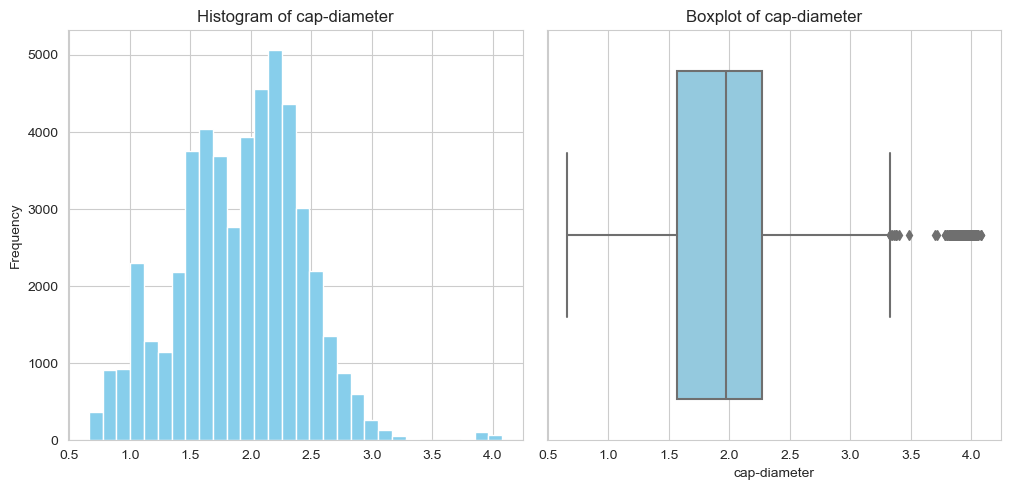

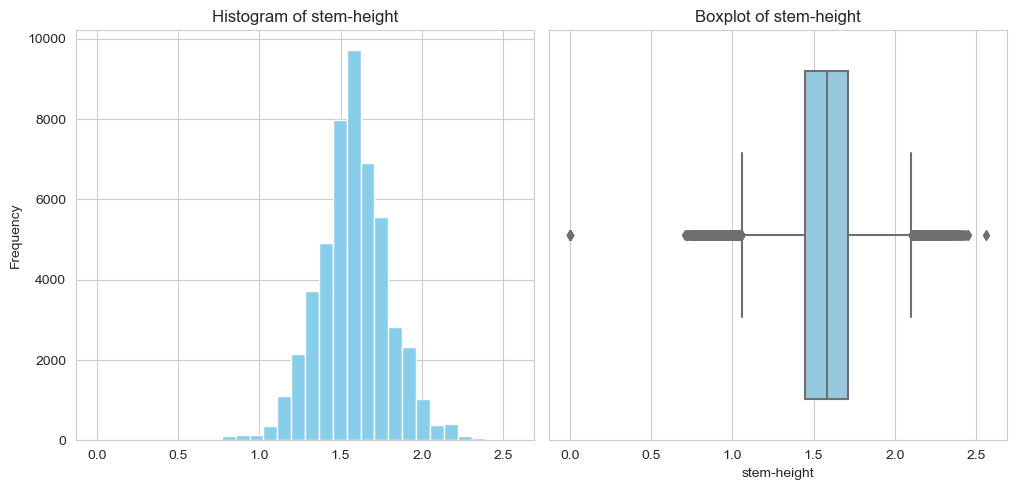

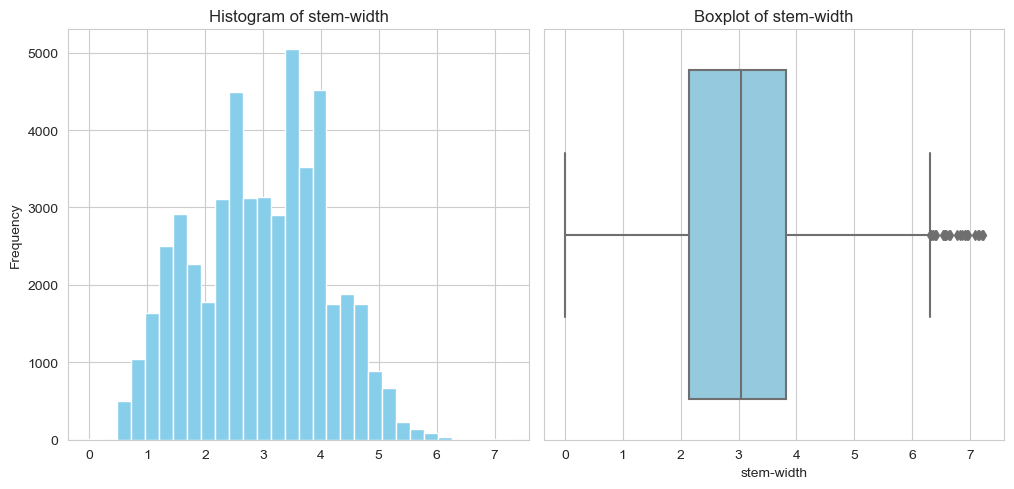

In [20]:
plot_detect_outliers ()

 ### <a id="IV.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.2 Detect outliers 🧐</p>

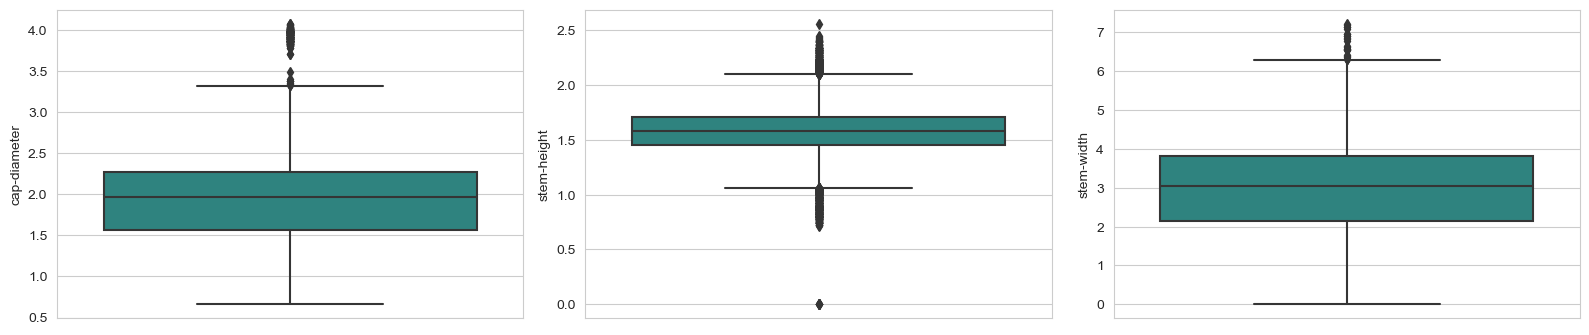

In [21]:
# features = X.select_dtypes(include=['number']).columns.tolist()
def plot_outliers(columns=X.select_dtypes(include=['number']).columns.tolist()):
    plt.figure(figsize=(16,10))
    for i,col in enumerate(columns):    
        plt.subplot(3,3,i + 1)
        sns.boxplot(y=col, data=X, palette='viridis')
        #plt.ylabel('')

    plt.tight_layout()
    plt.show()
plot_outliers()

In [22]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")


calculate_outliers_percentage(X)

Percentage of outliers in cap-diameter: 0.43%
Percentage of outliers in stem-height: 2.54%
Percentage of outliers in stem-width: 0.05%


In [23]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)

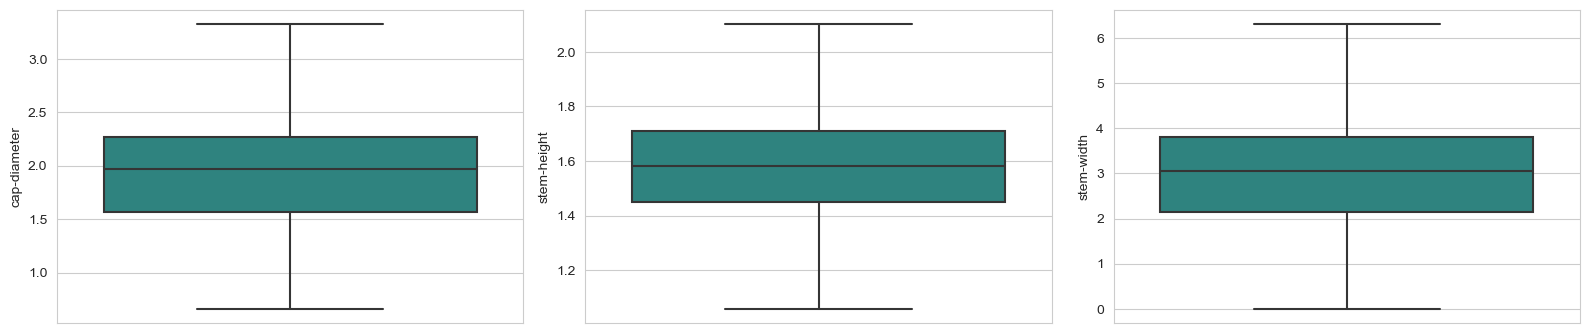

In [24]:
plot_outliers()

### <a id="IV.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.3 Categorical data transformation</p>

In [25]:
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <10]

X = pd.get_dummies(X, columns=categorical_cols)
# test = pd.get_dummies(test, columns=categorical_cols)

In [27]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
# test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

 ### <a id="IV.4"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.4 Normalizing data</p>

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 2044430 to 2633031
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cap-diameter                50000 non-null  float32
 1   cap-surface                 50000 non-null  float32
 2   cap-color                   50000 non-null  float32
 3   gill-color                  50000 non-null  float32
 4   stem-height                 50000 non-null  float32
 5   stem-width                  50000 non-null  float32
 6   stem-color                  50000 non-null  float32
 7   cap-shape_b                 50000 non-null  bool   
 8   cap-shape_c                 50000 non-null  bool   
 9   cap-shape_f                 50000 non-null  bool   
 10  cap-shape_noise             50000 non-null  bool   
 11  cap-shape_o                 50000 non-null  bool   
 12  cap-shape_p                 50000 non-null  bool   
 13  cap-shape_s                 

In [30]:
X = convert_types(X)

In [32]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

 ### <a id="IV.5"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.5 TSN</p>

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y, "original1.png")

In [ ]:
from yellowbrick.text import TSNEVisualizer
# Create the visualizer and draw the vectors
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.poof()

 ### <a id="IV.6"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.6 PCA</p>

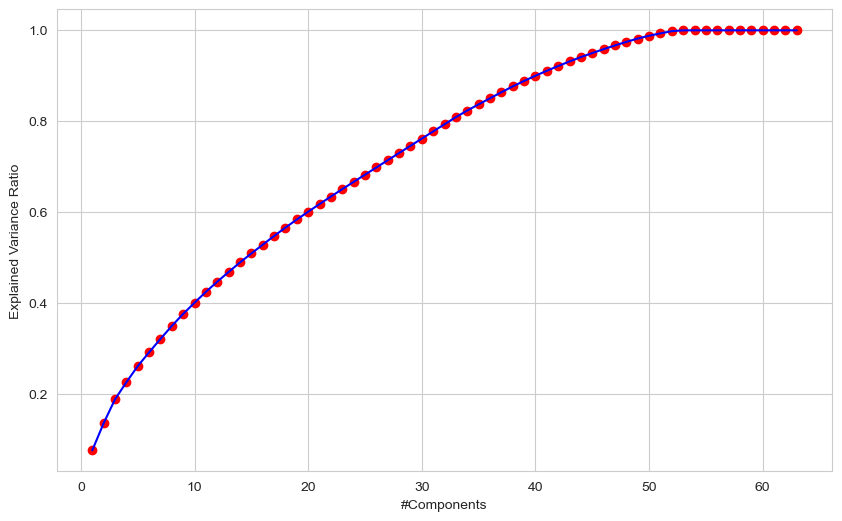

In [192]:
from sklearn.preprocessing import StandardScaler
pca = PCA()

pca_pipe = make_pipeline(StandardScaler(), pca)

pca_pipe.fit(X)
explained_variance_ratio = np.cumsum(pca_pipe[-1].explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)+1), explained_variance_ratio, "b-")
plt.scatter(range(1, len(X.columns)+1), explained_variance_ratio, c="red")
plt.xlabel("#Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Principal Component Analysis or PCA is a linear dimensionality reduction algorithm. In this technique, data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.
<li> We can preserve 99% of variance with 50 components if we use PCA.
</ul>
</div>

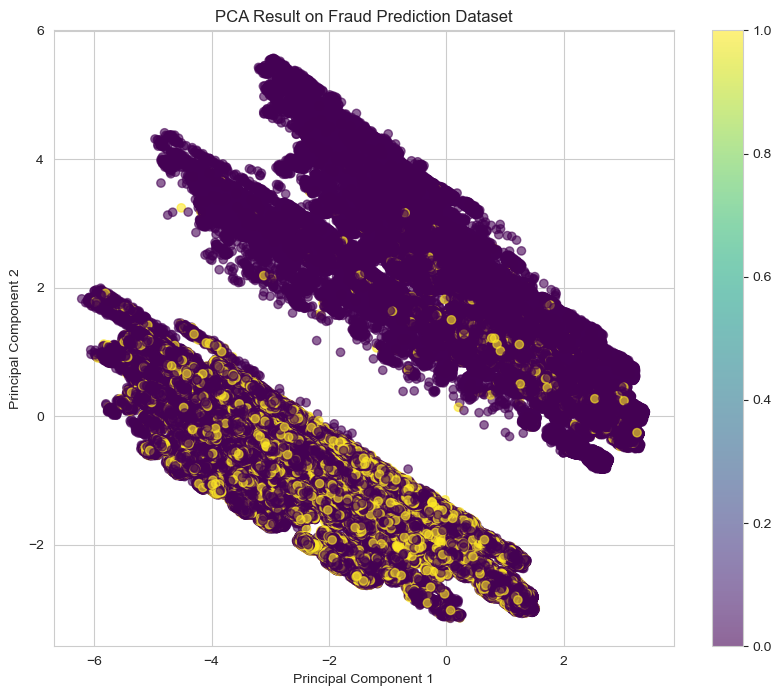

In [234]:
# Preparing the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

# Applying PCA
pca = PCA(n_components=2)  # Reduce to two dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.reset_index(drop=True, inplace=True)  # Reset the index of pca_df

train_df_reset = train.reset_index(drop=True)  # Reset the index of train_df
pca_df['Response'] = train_df_reset['Response']  # Add the target variable for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pca_df['Principal Component 1'], y=pca_df['Principal Component 2'],
                      c=pca_df['Response'], cmap='viridis', alpha=0.6)
plt.title('PCA Result on Fraud Prediction Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

### <a id="IV.7"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.7 Feature selections</p>

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 12))
sns.set_color_codes("pastel")
sns.barplot(x=train.corr()['class'].sort_values(ascending=False).values, y=train.corr()['prognosis'].sort_values(ascending=False).index, orient='h')

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li> There is a lot of feature variables so instead of engineering new features, we might want to focus on eliminating uninformative features and focusing on only the crucial ones.
PCAs might also be useful in this scenario where it allows us to pick out components which convey useful information about the data.
<li> Some of the features show close to 0 correlation with the target variable which could signal that it is useless to us
</ul>
</div>

In [82]:
discrete_features = X.dtypes == int

def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

Features  Scores
0                    habitat_d   0.055
1                   has-ring_f   0.055
2                  ring-type_f   0.052
3       does-bruise-or-bleed_f   0.052
4               gill-spacing_c   0.051
5                     season_a   0.043
6                  cap-shape_x   0.036
7            gill-attachment_a   0.024
8                     season_u   0.023
9                   stem-color   0.016
10                 cap-surface   0.015
11                   cap-color   0.012
12                  gill-color   0.011
13                  has-ring_t   0.010
14                 cap-shape_f   0.008
15           gill-attachment_d   0.005
16      does-bruise-or-bleed_t   0.004
17                   habitat_g   0.003
18              gill-spacing_d   0.003
19           gill-attachment_s   0.002
20           gill-attachment_x   0.002
21                   habitat_l   0.002
22                 ring-type_p   0.002
23                   habitat_m   0.002
24              gill-spacing_f   0.002
25                   habitat_p   0.002
26             cap-shape_noise   0.002
27             ring-type_noise   0.001
28                 ring-type_z   0.001
29                 cap-shape_b   0.001
30           gill-attachment_p   0.001
31                    season_w   0.001
32                 stem-height   0.001
33                 ring-type_r   0.001
34           gill-attachment_e   0.001
35                 cap-shape_s   0.001
36       gill-attachment_noise   0.001
37                cap-diameter   0.001
38                    season_s   0.000
39               habitat_noise   0.000
40          gill-spacing_noise   0.000
41                 ring-type_m   0.000
42                   habitat_h   0.000
43                   habitat_w   0.000
44                  stem-width   0.000
45                 cap-shape_o   0.000
46           gill-attachment_f   0.000
47                 cap-shape_p   0.000
48                 cap-shape_c   0.000
49                   habitat_u   0.000
50                 ring-type_e   0.000
51  does-bruise-or-bleed_noise   0.000
52                 ring-type_g   0.000
53                 ring-type_l   0.000
54              has-ring_noise   0.000

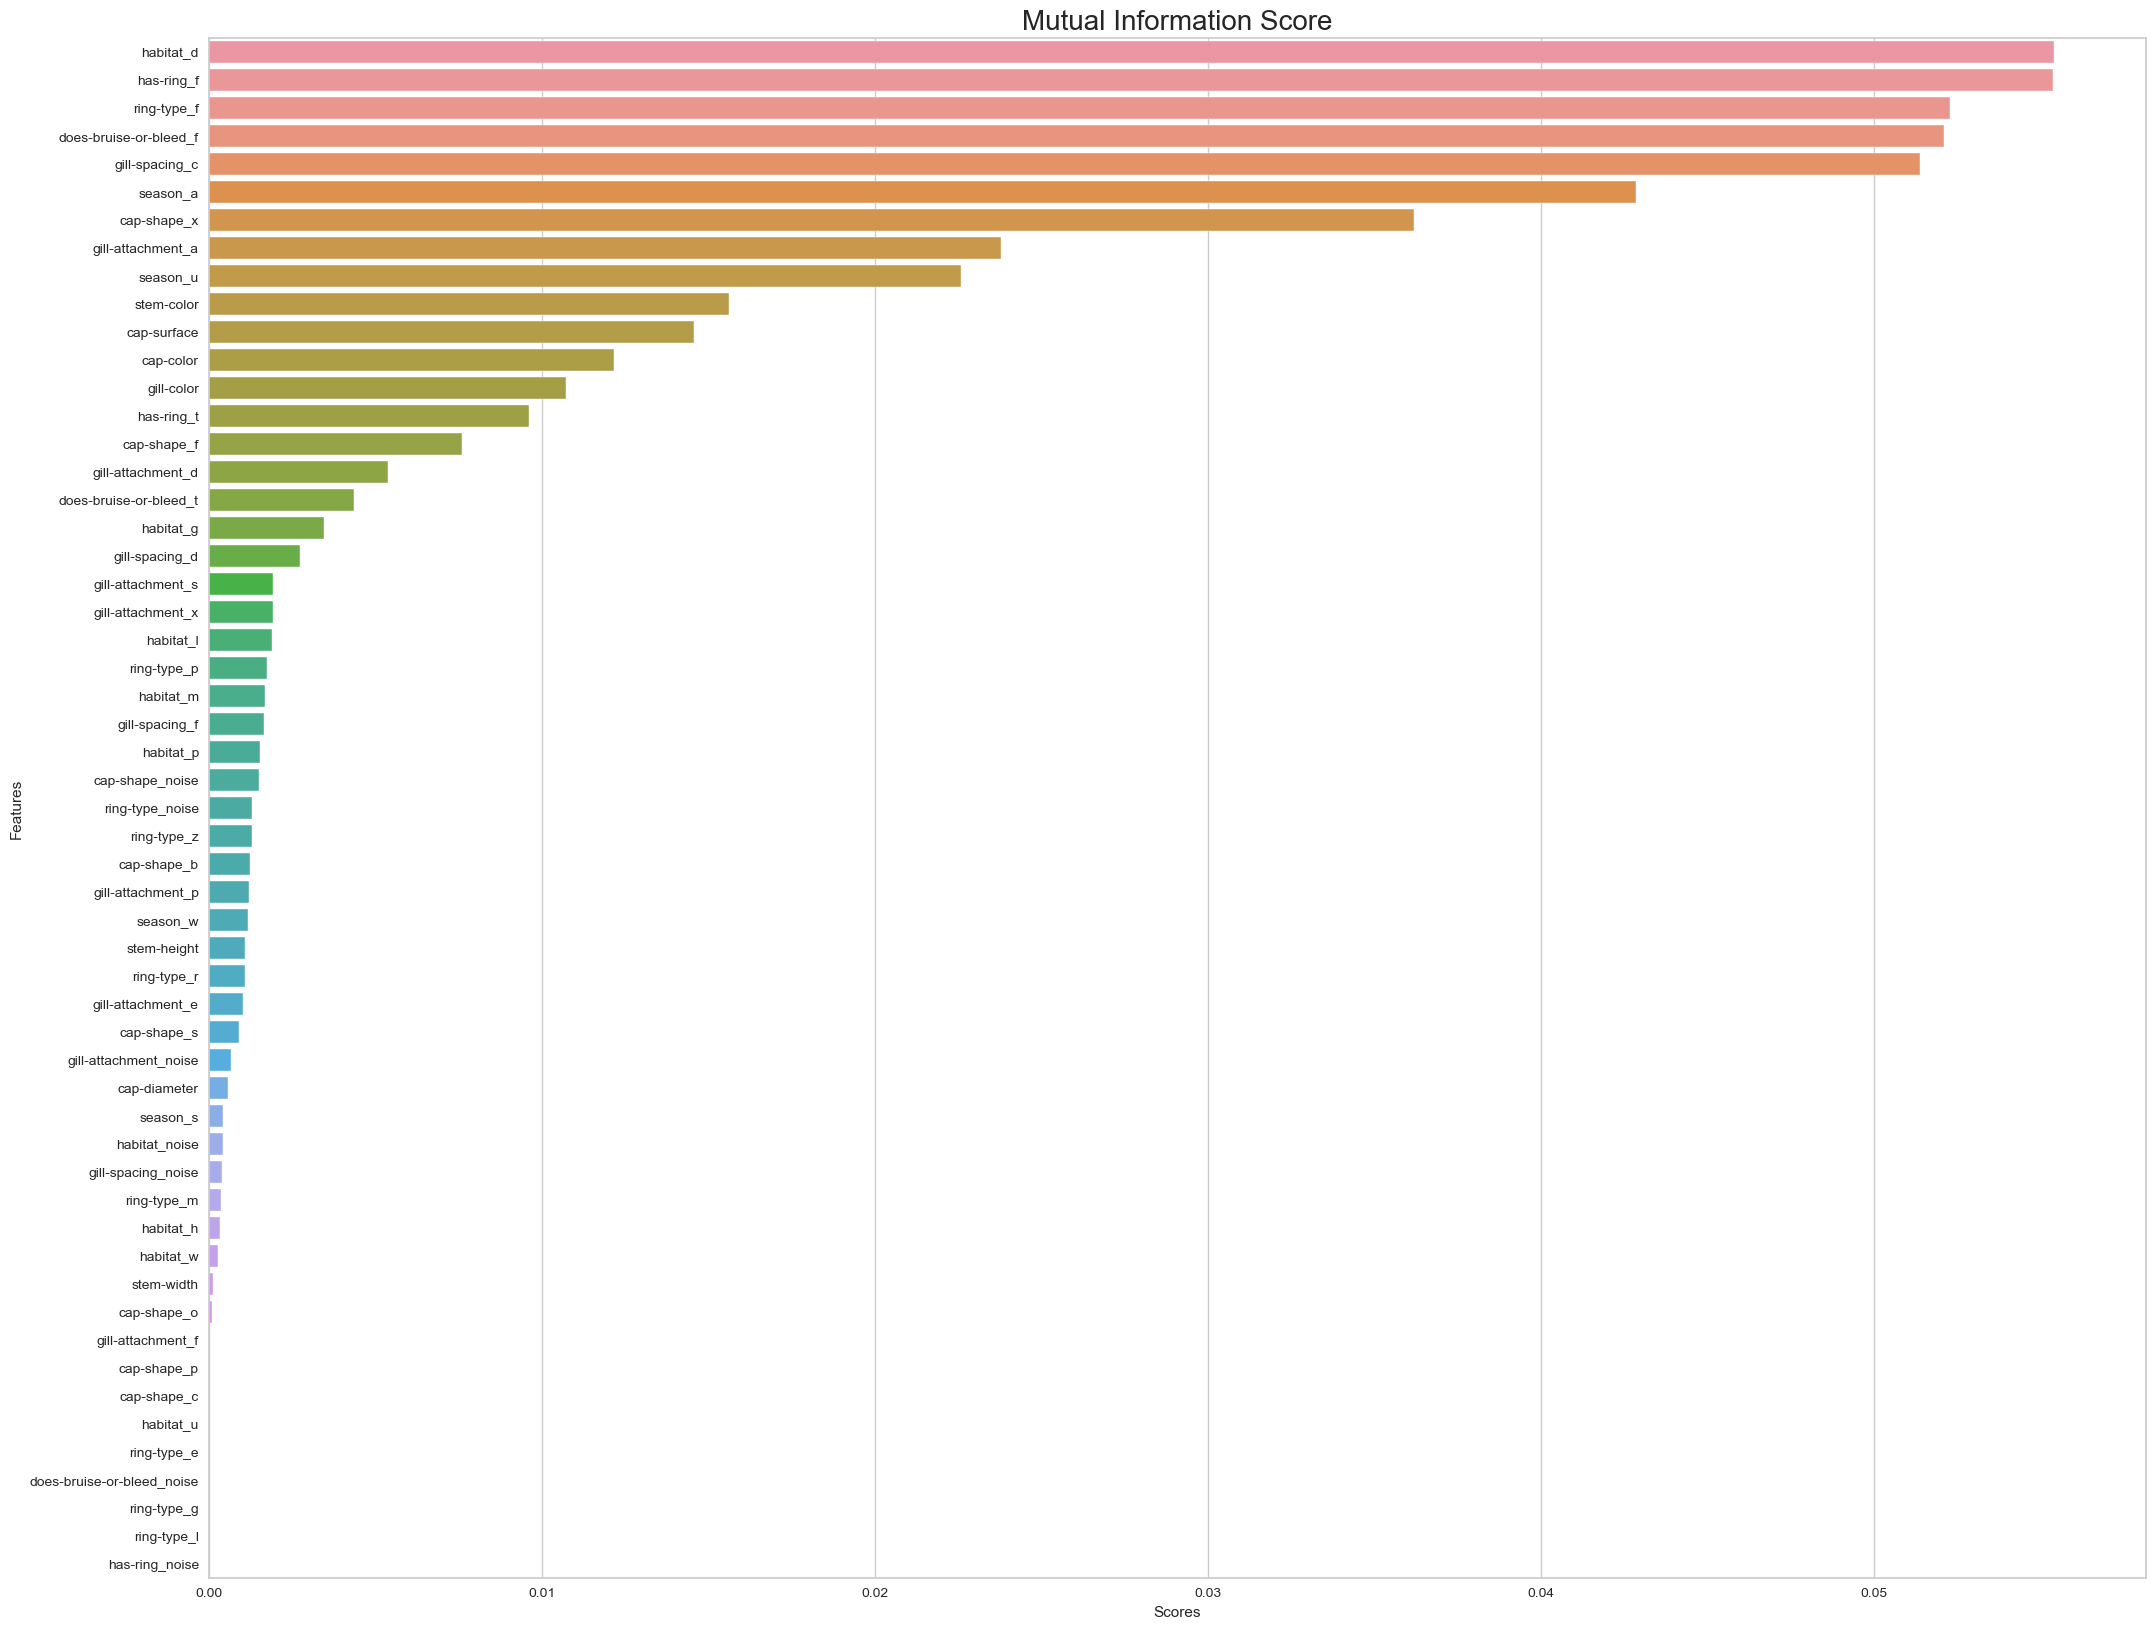

In [83]:
plt.figure(figsize=(25, 20))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Mutual Information Score
<li> Mutual Information Score helps us to understand how much the feature variables tell us about the target variable.

Since our data have a lot of feature variables, we can take help of this to remove redundant feature variables. This may improve the proformance of our model.
</ul>
</div>

In [6]:
# Feature selection
selection_0 = SelectFromModel(Lasso(alpha=0.01))
# SelectPercentile default f_classify
selection_1 = SelectPercentile(chi2, percentile=90)
selection_2 = SelectKBest(chi2, k=20)
selection_3 = SelectKBest(f_classif)
# ANOVA F-test in the f_classif() f_regression() function.
selection_4 = SelectKBest(f_regression)
selection_5 = SelectFromModel(Lasso(alpha=0.001))
#  RFE
selection_6 = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=10)
selection_7 = RFE(DecisionTreeRegressor(random_state=42), n_features_to_select=1)
selection_8 = RFE(RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42), n_features_to_select=10)
#  RFECV
selection_9 = RFECV(estimator=RandomForestRegressor(), min_features_to_select=30)
selection_10 = RFECV(estimator=RandomForestRegressor(random_state=42), step=1, cv=10, scoring='r2')
# min_features_to_select — The minimum number of features to be selected.
selection_11 = SelectPercentile(mutual_info_regression, percentile=90)
selection_12 = SelectKBest(mutual_info_classif, k=50)
# Boruta
selection_13 = BorutaPy(RandomForestRegressor(max_depth = 5), n_estimators='auto', verbose=2, random_state=42)
selection_14 = BorutaPy(RandomForestRegressor(max_depth=5),n_estimators='auto', verbose=2, random_state=42, max_iter=50, perc=90)

 ### <a id="IV.8"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.8 Imbalanced target - oversampling by SMOTE</p>

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [43]:
train['class'].value_counts()

class
1    1705396
0    1411549
Name: count, dtype: int64

In [207]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [26]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

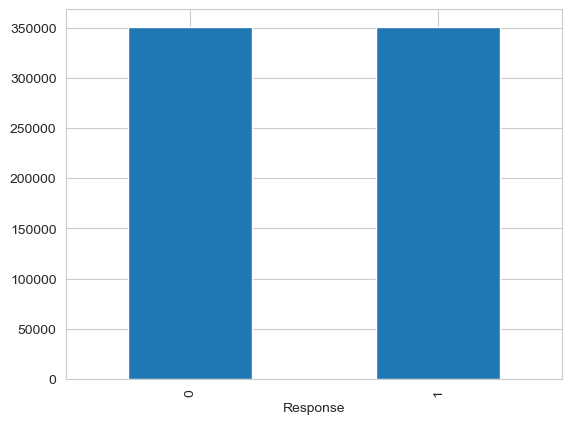

In [27]:
pd.Series(y_train_smote).value_counts().plot.bar();

In [28]:
X_train_smote.shape

(701590, 20)

In [29]:
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    350795
1     49205
Name: count, dtype: int64

Response
0    350795
1    350795
Name: count, dtype: int64


In [175]:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# X_train_scaled = scaler.fit_transform(X_train_smote)
# data_scaled = scaler.fit_transform(X)

### <a id="IV.9"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.9 AutoEncoder</p>

In [ ]:
# Reducing of dimensions by Autoencoder
# I think not always the autocoder can be the winner model.
# They might be the "winner" for tasks that rely on dimensionality reduction, 
# feature extraction, or anomaly detection, especially when data is unlabeled.


class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim*3),
            nn.ReLU(),
            nn.Linear(encoding_dim*3, encoding_dim*2),
            nn.ReLU(),
            nn.Linear(encoding_dim*2, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim*2),
            nn.ReLU(),
            nn.Linear(input_dim*2, input_dim*3),
            nn.ReLU(),
            nn.Linear(input_dim*3, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


def perform_autoencoder(df, encoding_dim=50, epochs=50, batch_size=32):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    data_tensor = torch.FloatTensor(df_scaled)
    
    input_dim = data_tensor.shape[1]
    autoencoder = AutoEncoder(input_dim, encoding_dim)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters())
    
    for epoch in range(epochs):
        for i in range(0, len(data_tensor), batch_size):
            batch = data_tensor[i : i + batch_size]
            optimizer.zero_grad()
            reconstructed = autoencoder(batch)
            loss = criterion(reconstructed, batch)
            loss.backward()
            optimizer.step()
            
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}]')
                 
    with torch.no_grad():
        encoded_data = autoencoder.encoder(data_tensor).numpy()
        
    df_encoded = pd.DataFrame(encoded_data, columns=[f'Enc_{i + 1}' for i in range(encoded_data.shape[1])])
    
    return df_encoded

X = perform_autoencoder(X, encoding_dim=60, epochs=100, batch_size=32)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="V"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700">V <span style='color:#CDA63A'>|</span>MODEL ENGINEERING 🤖</div>

In [6]:
from abc import ABC, abstractmethod
from typing import Tuple, Type

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from scipy.stats import boxcox

In [9]:
# drop columns with missing values > 65% 
def droping_columns(df):
    Missing = df.isna().mean()*100
    colums_to_drop = df.columns[Missing>65]
    df.drop(columns = colums_to_drop, inplace=True)
    return df

def cleaning(df):
    threshold = 101   
    for i in df.select_dtypes(include=['category']).columns:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.add_categories(['missing', 'noise'])        
        df[i] = df[i].fillna(df[i].mode()[0])  
    
        count = df[i].value_counts(dropna=False)
        less_freq = count[count < threshold].index
        
        df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)   
    return df

def dataset_stabilizer(data):
    for col in data.select_dtypes(exclude=['number']).columns:
        data[col] = data[col].fillna(data[col].mode()[0])
     
    for col in data.select_dtypes(include=['number']).columns:
        data[col] = data[col].fillna(data[col].mean())       
    return data

def convert_types (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    numerical_int = df.select_dtypes(include=['int64'])
    numerical_float = df.select_dtypes(include=['float64'])   
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df


def apply_boxcox(df):
    columns=df.select_dtypes(include=['number']).columns.tolist()
    df_transformed = df.copy()
    
    for col in columns:
        # Ensure the data is strictly positive
        if (df[col] > 0).any():
            # Shift the data if there are zero or negative values
            shift = abs(df[col].min()) + 1
            df_transformed[col] = df[col] + shift
        else:
            shift = 0        
        df_transformed[col], best_lambda = boxcox(df_transformed[col])
        
    return df_transformed

def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

In [10]:
X = train.drop(columns=['id','class']).copy()
y = train['class']

label = LabelEncoder()
y=label.fit_transform(y)
y = y.astype('int16')

X= X.fillna(np.nan)
X = dataset_stabilizer(X)
# Drop columns with missing values > 85%
X=droping_columns(X)

categorical_columns = X.select_dtypes(exclude=['number'])
numerical_columns = X.select_dtypes(include=['number'])

X = cleaning(X)
X = convert_types(X)
# Handle the Skeweness
X = apply_boxcox(X)
X = handle_outliers(X)

categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <10]
X = pd.get_dummies(X, columns=categorical_cols)

categorical_columns = X.select_dtypes(include=['category', 'object']).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))

X = convert_types(X)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
test = test.drop(columns=['id']).copy()

test= test.fillna(np.nan)
test = dataset_stabilizer(test)
# Drop columns with missing values > 85%
test=droping_columns(test)

categorical_columns = test.select_dtypes(exclude=['number'])
numerical_columns = test.select_dtypes(include=['number'])

test = cleaning(test)
test = convert_types(test)
# Handle the Skeweness
test = apply_boxcox(test)
test = handle_outliers(test)

categorical_cols = [cname for cname in test.columns if  
                        test[cname].dtype in ['category','object'] and test[cname].nunique() <10]
test = pd.get_dummies(test, columns=categorical_cols)

categorical_columns = test.select_dtypes(include=['category', 'object']).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

test = convert_types(test)
scaler = MinMaxScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
StratifiedKFold
<li> Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.
</ul>
</div>

In [12]:
def model_evaluation(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    print("Score by 'accuracy' = %.3f (%.3f)"% (np.mean(n_scores), np.std(n_scores)))
    
 
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc_ovo')
    print("Score by 'AUC': %.2f (%.2f)"% (np.mean(n_scores), np.std(n_scores)))

In [13]:
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")
    

def kfold_accuracy_RSKFold(model): 
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovo')
    print("score by 'AUC': %.2f (%.2f)"% (np.mean(n_scores), np.std(n_scores)))


def kfold_accuracy(model): 
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    print("Score by 'accuracy' = %.3f (%.3f)"% (np.mean(n_scores), np.std(n_scores)))
    
def kfold_AUC(model):  
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc_ovo')
    print("Score by 'AUC': %.2f (%.2f)"% (np.mean(n_scores), np.std(n_scores)))

In [14]:
def create_measures(y,y_pred):
    # minimalna wartość dla cut offa dla takiej samej ilości badów jak występuje w próbce
    cut_off = np.sort(y_pred)[-y.sum():].min()
#     cut_off = 0.263
    y_pred_class = np.array([0 if x < cut_off else 1 for x in y_pred])
     
    d = {'f1_score': [round(f1_score(y, y_pred_class),4)],
         'P-R score': [round(average_precision_score(y, y_pred_class),4)],
         'matthews': [round(matthews_corrcoef(y, y_pred_class),4)],
         'accuracy': [round(accuracy_score(y, y_pred_class),4)],
         'recall': [round(recall_score(y, y_pred_class),4)],
         'precision': [round(precision_score(y, y_pred_class),4)],
         'min cut_off': cut_off,
        }
     
    return pd.DataFrame.from_dict(d)
  
def calculating_metrics(X_train, X_valid, y_train, y_valid, model):
    train = create_measures(y_train, model.predict_proba(X_train)[:, 1])
    valid = create_measures(y_valid, model.predict_proba(X_valid)[:, 1])
      
    return pd.concat([train,valid]).set_index([pd.Index(['TRAIN', 'VALID'])]) 

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [16]:
print(f'train_normal shape: {train.shape};')
print(f'X shape: {X.shape};')
print(f'X_train shape: {X_train.shape};')
print(f'X_valid shape: {X_valid.shape}; y_valid shape: {y_valid.shape}')

train_normal shape: (50000, 22);
X shape: (50000, 81);
X_train shape: (40000, 81);
X_valid shape: (10000, 81); y_valid shape: (10000,)


 ### <a id="V.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.1 Sequential API model 1</p>

In [48]:
# Define a deeper model with more nodes and Dropout
model_1 = Sequential([
    Dense(4096, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [50]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
model_1.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.9469 - loss: 0.1472 - val_accuracy: 0.9341 - val_loss: 0.1695 - learning_rate: 0.0010
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9604 - loss: 0.1185 - val_accuracy: 0.9572 - val_loss: 0.1267 - learning_rate: 0.0010
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9629 - loss: 0.1194 - val_accuracy: 0.9736 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.9709 - loss: 0.0982 - val_accuracy: 0.9711 - val_loss: 0.0974 - learning_rate: 0.0010
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.9729 - loss: 0.0874 - val_accuracy: 0.9695 - val_loss: 0.0986 - learning_rate: 0.0010
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9724 - loss: 0.0905 - val_accuracy: 0.9751 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9759 - l

In [43]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history = model_1.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.7306 - loss: 0.4995 - val_accuracy: 0.9489 - val_loss: 0.1617 - learning_rate: 0.0010
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9475 - loss: 0.1480 - val_accuracy: 0.9618 - val_loss: 0.1345 - learning_rate: 0.0010
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9617 - loss: 0.1217 - val_accuracy: 0.9589 - val_loss: 0.1515 - learning_rate: 0.0010
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9637 - loss: 0.1169 - val_accuracy: 0.9709 - val_loss: 0.0997 - learning_rate: 0.0010
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9695 - loss: 0.0962 - val_accuracy: 0.9658 - val_loss: 0.1240 - learning_rate: 0.0010
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9683 - loss: 0.1051 - val_accuracy: 0.9661 - val_loss: 0.1054 - learning_rate: 0.0010
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.9698 - l

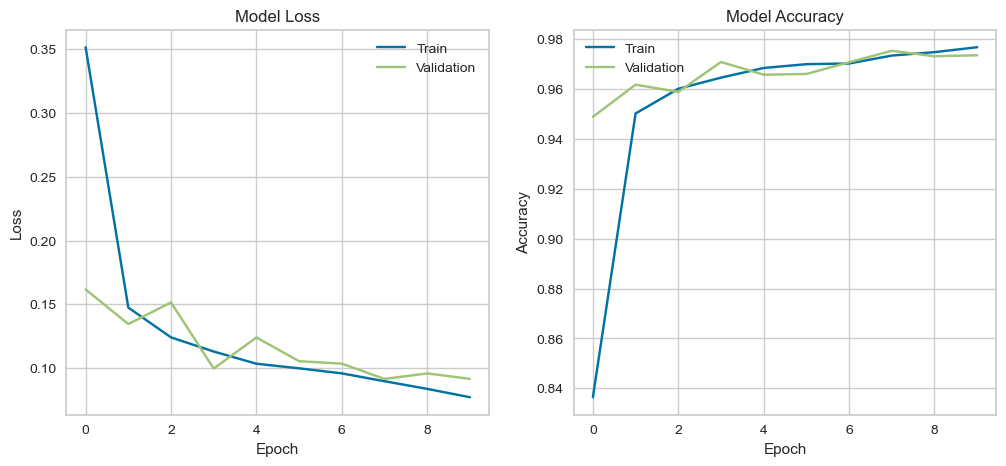

In [44]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [ ]:
model_1.summary()

 ### <a id="V.1.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.1.1 Sequential API Model 2</p>

In [77]:
# Define a deeper model with more nodes and Dropout
model_11 = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [78]:
# Compile model
little_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_11.compile(loss='binary_crossentropy', 
              optimizer=little_adam, 
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=25, min_lr=1e-6)

# Train model with early stopping
history_11 = model_11.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6803 - loss: 0.5758 - val_accuracy: 0.8840 - val_loss: 0.3805 - learning_rate: 0.0010
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8811 - loss: 0.3673 - val_accuracy: 0.8998 - val_loss: 0.2461 - learning_rate: 0.0010
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9363 - loss: 0.1921 - val_accuracy: 0.9558 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9526 - loss: 0.1496 - val_accuracy: 0.9638 - val_loss: 0.1253 - learning_rate: 0.0010
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9607 - loss: 0.1311 - val_accuracy: 0.9623 - val_loss: 0.1218 - learning_rate: 0.0010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9640 - loss: 0.1257 - val_accuracy: 0.9663 - val_loss: 0.1097 - learning_rate: 0.0010
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9637 - loss: 0.

In [79]:
history_11.history['accuracy']

[0.7794749736785889,
 0.8933749794960022,
 0.9429500102996826,
 0.9546250104904175,
 0.9605749845504761,
 0.9631749987602234,
 0.9654750227928162,
 0.9663000106811523,
 0.9678999781608582,
 0.9705749750137329,
 0.9719750285148621,
 0.9724500179290771,
 0.9697999954223633,
 0.9718499779701233,
 0.9738749861717224,
 0.9756249785423279,
 0.9760749936103821,
 0.9755749702453613,
 0.9771000146865845,
 0.9769499897956848,
 0.9768999814987183,
 0.977649986743927,
 0.9785500168800354,
 0.9787750244140625,
 0.9765499830245972,
 0.9760749936103821,
 0.9785249829292297,
 0.9767749905586243,
 0.9762499928474426,
 0.9773499965667725,
 0.9794250130653381,
 0.979324996471405,
 0.9776250123977661,
 0.9796500205993652,
 0.9797250032424927,
 0.9778249859809875,
 0.9790999889373779,
 0.9815499782562256,
 0.9775500297546387,
 0.9810749888420105,
 0.9776999950408936,
 0.9797250032424927,
 0.9798250198364258,
 0.9813500046730042,
 0.9806749820709229,
 0.9798250198364258,
 0.9811999797821045,
 0.981774985790

In [80]:
history_11.history['val_accuracy']

[0.8840000033378601,
 0.8998000025749207,
 0.9557999968528748,
 0.9638000130653381,
 0.9623000025749207,
 0.9663000106811523,
 0.9660000205039978,
 0.972599983215332,
 0.9713000059127808,
 0.9714000225067139,
 0.9728000164031982,
 0.9732000231742859,
 0.9739999771118164,
 0.9736999869346619,
 0.9769999980926514,
 0.9753999710083008,
 0.9693999886512756,
 0.9711999893188477,
 0.9761999845504761,
 0.9757999777793884,
 0.9768000245094299,
 0.9769999980926514,
 0.9782000184059143,
 0.9775000214576721,
 0.9768999814987183,
 0.9757000207901001,
 0.9776999950408936,
 0.9743000268936157,
 0.9768000245094299,
 0.9783999919891357,
 0.979200005531311,
 0.9789000153541565,
 0.9782999753952026,
 0.9785000085830688,
 0.9775999784469604,
 0.9746000170707703,
 0.9797000288963318,
 0.9765999913215637,
 0.9787999987602234,
 0.9797999858856201,
 0.9797000288963318,
 0.973800003528595,
 0.9775999784469604,
 0.9786999821662903,
 0.980400025844574,
 0.9761999845504761,
 0.9794999957084656,
 0.97920000553131

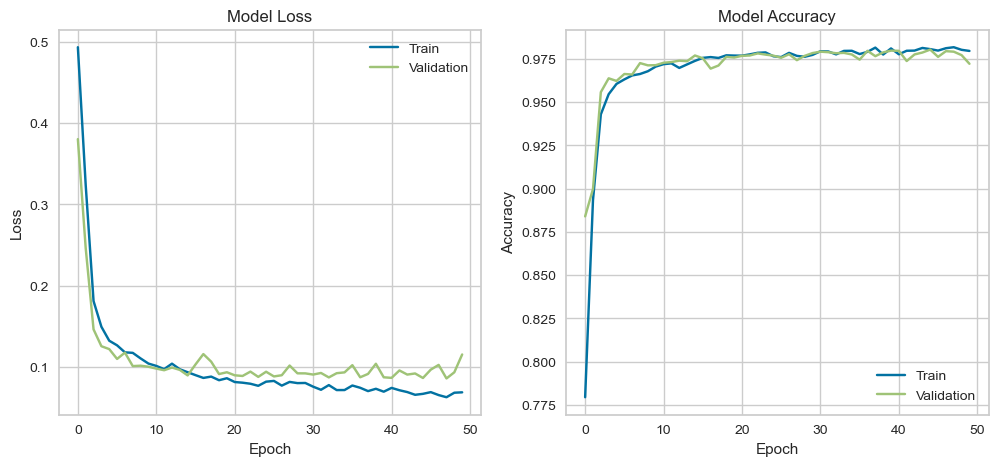

In [81]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [82]:
model_11.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2048)           │       124,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769,509 (33.45 MB)

 Trainable params: 2,923,169 (11.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,846,340 (22.30 MB)

In [ ]:
train_ts_encoded = perform_autoencoder(X, encoding_dim=60, epochs=100, batch_size=32)
test_ts_encoded = perform_autoencoder(test, encoding_dim=60, epochs=100, batch_size=32)

 ### <a id="V.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.2 CatBoostClassifier</p>

In [20]:
model_2 = CatBoostClassifier(random_state=42)

In [21]:
model_2.fit(X_train,y_train, verbose = 50)

Learning rate set to 0.049775
0:	learn: 0.6706112	total: 134ms	remaining: 2m 13s
50:	learn: 0.2913921	total: 436ms	remaining: 8.11s
100:	learn: 0.1753885	total: 750ms	remaining: 6.67s
150:	learn: 0.1197916	total: 1.09s	remaining: 6.12s
200:	learn: 0.0911918	total: 1.4s	remaining: 5.55s
250:	learn: 0.0732136	total: 1.69s	remaining: 5.05s
300:	learn: 0.0623823	total: 2s	remaining: 4.63s
350:	learn: 0.0548809	total: 2.31s	remaining: 4.27s
400:	learn: 0.0502069	total: 2.61s	remaining: 3.89s
450:	learn: 0.0465866	total: 2.9s	remaining: 3.54s
500:	learn: 0.0443312	total: 3.2s	remaining: 3.18s
550:	learn: 0.0421784	total: 3.52s	remaining: 2.87s
600:	learn: 0.0403929	total: 3.82s	remaining: 2.54s
650:	learn: 0.0390847	total: 4.11s	remaining: 2.2s
700:	learn: 0.0376607	total: 4.4s	remaining: 1.88s
750:	learn: 0.0363960	total: 4.72s	remaining: 1.57s
800:	learn: 0.0351688	total: 5.02s	remaining: 1.25s
850:	learn: 0.0340802	total: 5.32s	remaining: 931ms
900:	learn: 0.0331867	total: 5.61s	remaining

 ### <a id="V.2.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.2.1 CatBoostClassifier - Validation</p>

In [ ]:
y_proba_2= model_2.predict_proba(X_valid)[:,1]

In [125]:
# 'ovo' (One-vs-One) or 'ovr' (One-vs-Rest)
print("Validation Area Under the Curve (AUC): ", roc_auc_score(y_valid, y_proba_2, multi_class='ovo'))

Validation Area Under the Curve (AUC):  0.9964374250403666


In [22]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_2)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     0.994      0.991     0.986     0.993   0.994      0.994        0.378
VALID     0.990      0.985     0.977     0.989   0.990      0.990        0.368

In [127]:
y_pred_2 = model_2.predict(X_valid)

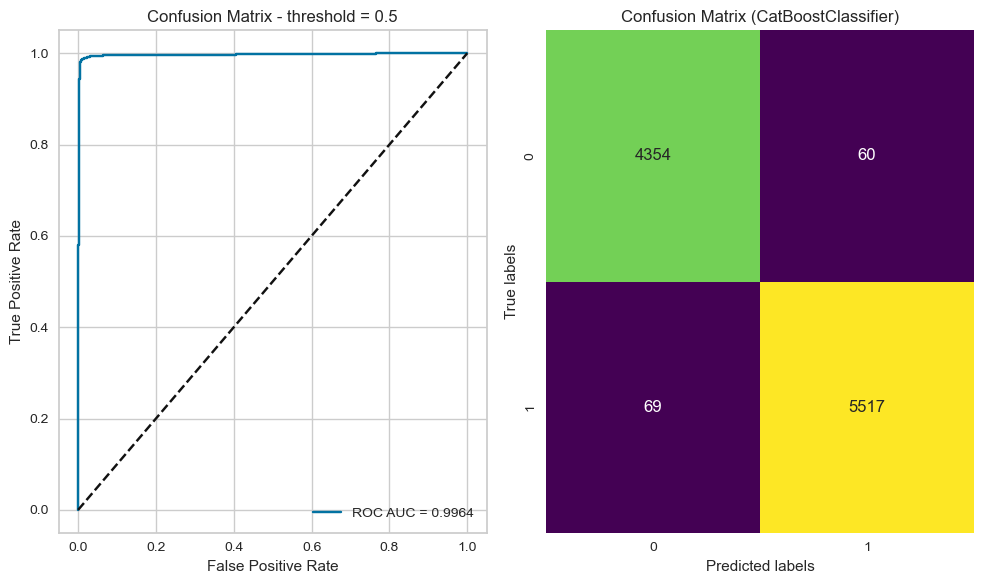

In [128]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot ROC curve
roc_auc_test_cat = roc_auc_score(y_valid, y_proba_2)
fpr_cat, tpr_cat, _ = roc_curve(y_valid, y_proba_2)
axes[0].plot(fpr_cat, tpr_cat, label=f'ROC AUC = {roc_auc_test_cat:.4f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Confusion Matrix - threshold = 0.5')
axes[0].legend(loc='best')

# Confusion matrix
cm_cat = confusion_matrix(y_valid, y_pred_2)


# Plot confusion matrix
sns.heatmap(cm_cat, annot=True, fmt='.0f', cmap='viridis', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Confusion Matrix (CatBoostClassifier)')

plt.tight_layout()
plt.show()

 ### <a id="V.3"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3 XGBClassifier</p>

In [23]:
xgb_params = {    
        'max_depth': 13, 
        'min_child_weight': 5,
        'learning_rate': 0.02,
        'colsample_bytree': 0.6,         
        'max_bin': 3000, 
        'n_estimators': 1500 
}

# Calculate the ratio of negative class to positive class
# ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

model_3 = XGBClassifier(**xgb_params,  random_state=42)
model_3.fit(X_train, y_train)

y_proba_3 = model_3.predict_proba(X_valid)[:,1]
print("Validation Area Under the Curve (AUC): ", roc_auc_score(y_valid, y_proba_3))

Validation Area Under the Curve (AUC):  0.9967186994612031


 ### <a id="V.3.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.1 XGBClassifier - Validation</p>

In [133]:
model_train(model_3, 'XGBClassifier')

XGBClassifier - Train Score = 99.515%
XGBClassifier - Valid Score = 98.85000000000001%
XGBClassifier - Mean Squared Error = 0.0115
XGBClassifier - Mean Absolute Error = 0.0115


In [134]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_3)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     0.996      0.994     0.991     0.996   0.996      0.996        0.396
VALID     0.990      0.985     0.977     0.989   0.990      0.990        0.478

In [135]:
y_pred_3 = model_3.predict(X_valid)

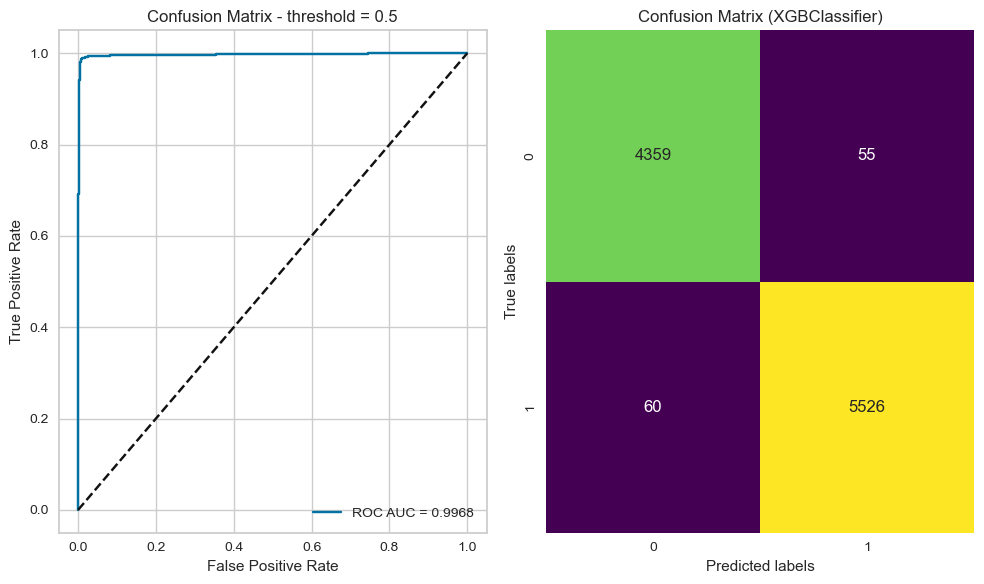

In [136]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot ROC curve
roc_auc_test_xgb = roc_auc_score(y_valid, y_proba_3)
fpr_xgb, tpr_xgb, _ = roc_curve(y_valid, y_proba_3)
axes[0].plot(fpr_xgb, tpr_xgb, label=f'ROC AUC = {roc_auc_test_xgb:.4f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Confusion Matrix - threshold = 0.5')
axes[0].legend(loc='best')

# Confusion matrix
cm_xgb = confusion_matrix(y_valid, y_pred_3)


# Plot confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='.0f', cmap='viridis', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Confusion Matrix (XGBClassifier)')

plt.tight_layout()
plt.show()

 ### <a id="V.4"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4 RandomForestClassifier</p>

In [24]:
model_4 = RandomForestClassifier(n_jobs=1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=42,
                             verbose=False)

In [25]:
model_4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=42, n_jobs=1, random_state=42,
                       verbose=False)

 ### <a id="V.4.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.1 RandomForestClassifier - Validation</p>

In [73]:
model_train(model_41, 'RandomForestClassifier')

RandomForestClassifier - Train Score = 99.99249999999999%
RandomForestClassifier - Valid Score = 98.82%
RandomForestClassifier - Mean Squared Error = 0.0118
RandomForestClassifier - Mean Absolute Error = 0.0118


In [26]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_4)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     1.000      1.000     1.000     1.000   1.000      1.000        0.500
VALID     0.989      0.984     0.976     0.988   0.990      0.989        0.429

In [140]:
y_pred_4 = model_4.predict(X_valid)

In [141]:
print(classification_report(y_valid,y_pred_4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4414
           1       0.99      0.99      0.99      5586

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_4)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     1.000      1.000     1.000     1.000   1.000      1.000        0.500
VALID     0.989      0.984     0.976     0.988   0.990      0.989        0.429

In [78]:
kfold_AUC(model_4)

Score by 'AUC': 1.00 (0.00)


In [142]:
y_proba_4 = model_4.predict_proba(X_valid)[:,1]
print(f'Validation Area Under the Curve (AUC):  {roc_auc_score(y_valid, y_proba_4):.4f}')

Validation Area Under the Curve (AUC):  0.9961


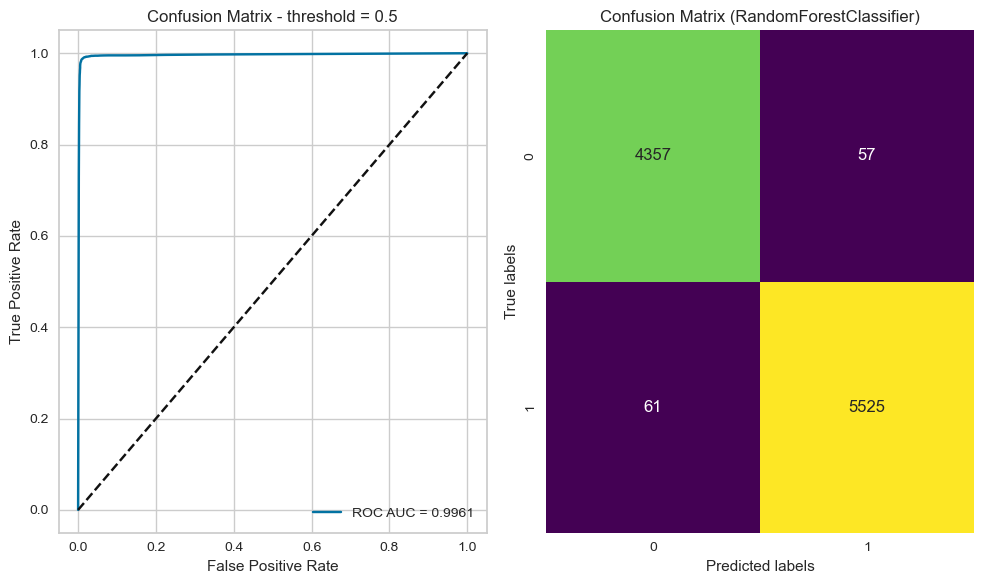

In [143]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot ROC curve
roc_auc_test_rfc = roc_auc_score(y_valid, y_proba_4)
fpr_rfc, tpr_rfc, _ = roc_curve(y_valid, y_proba_4)
axes[0].plot(fpr_rfc, tpr_rfc, label=f'ROC AUC = {roc_auc_test_rfc:.4f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Confusion Matrix - threshold = 0.5')
axes[0].legend(loc='best')

# Confusion matrix
cm_rfc = confusion_matrix(y_valid, y_pred_4)


# Plot confusion matrix
sns.heatmap(cm_rfc, annot=True, fmt='.0f', cmap='viridis', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Confusion Matrix (RandomForestClassifier)')

plt.tight_layout()
plt.show()

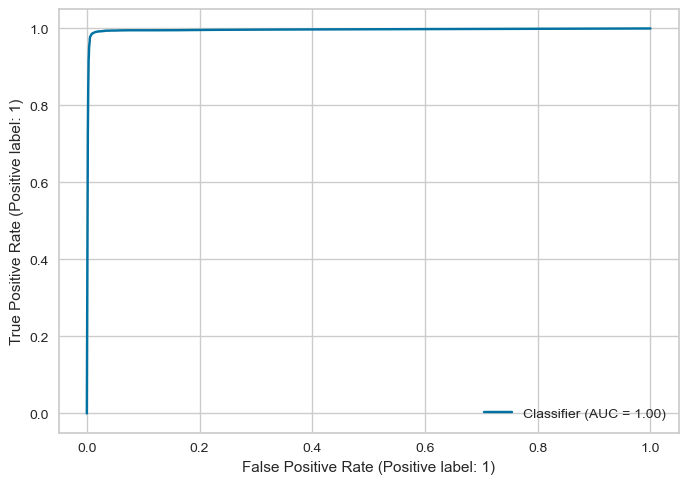

In [82]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid, y_proba_41)

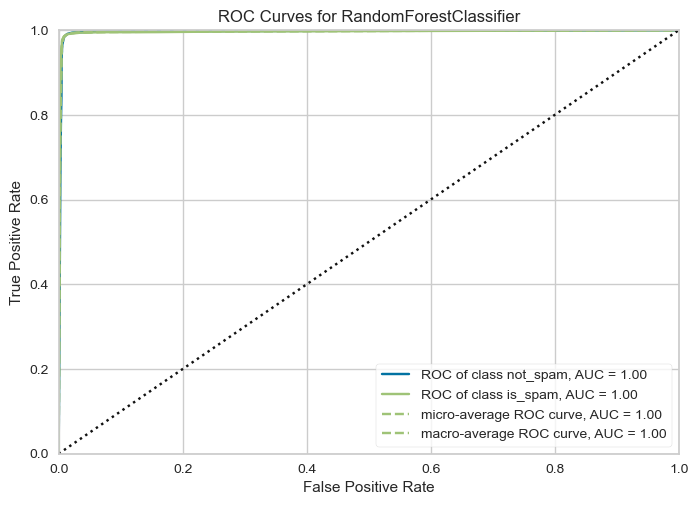

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [144]:
visualizer_4 = ROCAUC(model_4, classes=["not_spam", "is_spam"])
visualizer_4.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_4.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_4.show()     

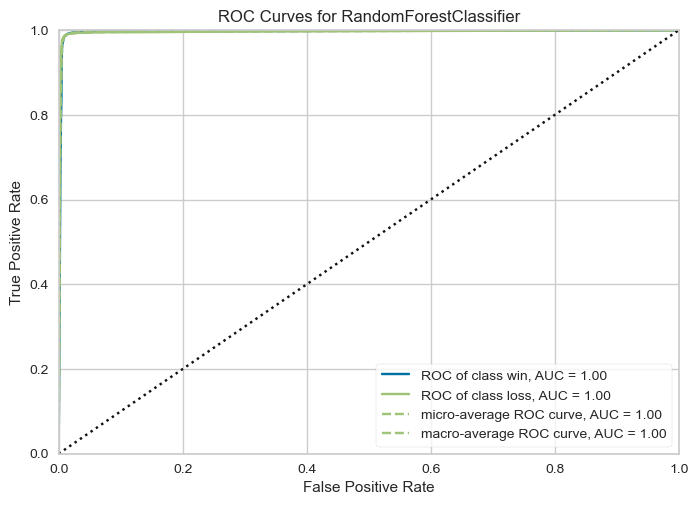

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [145]:
visualizer_41 = ROCAUC(model_4, classes=["win", "loss", "draw"])
visualizer_41.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_41.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_41.show()  

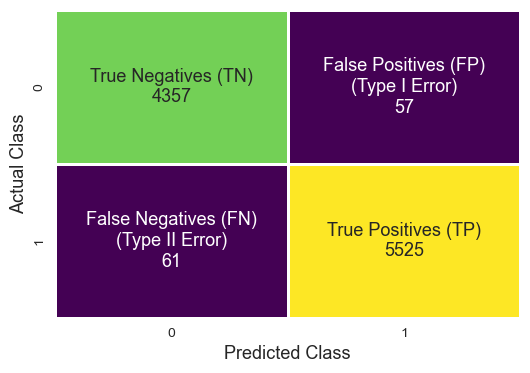

In [146]:
plt.figure(figsize=(6,4))


clf_matrix = confusion_matrix(y_valid, y_pred_4)

condition_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
                   'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
condition_values = [value for value in clf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(condition_names, condition_values)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(clf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1, cbar=False)
ax.set_xlabel('Predicted Class', fontsize=13)
ax.set_ylabel('Actual Class', fontsize=13);

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The score AUC for this model with default threshold = 0.5 is very well AUC =  84%. 
<li> TP and FP are enormous small. Let's do some checks for different threshold values.
</ul>
</div>

In [147]:
threshold = 0.2
y_pred_4_02 = (model_4.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_4_02)

array([[4192,  222],
       [  30, 5556]], dtype=int64)

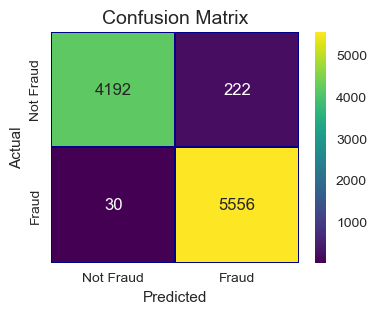

In [148]:
cm_4_02 = pd.crosstab(y_valid, y_pred_4_02, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,3))
sns.heatmap(cm_4_02, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="viridis", fmt='.0f')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [149]:
threshold = 0.4
y_pred_4_04 = (model_4.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_4_04)

array([[4324,   90],
       [  42, 5544]], dtype=int64)

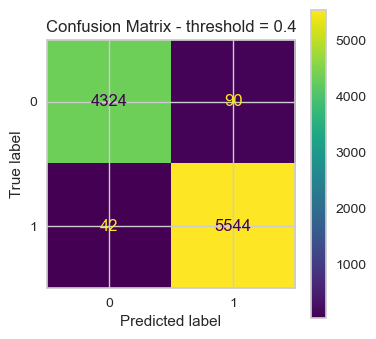

In [150]:
confusion_mat_4_04 = confusion_matrix(y_valid, y_pred_4_04)
disp = ConfusionMatrixDisplay(confusion_mat_4_04)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - threshold = 0.4")
plt.show()

In [151]:
threshold = 0.8
y_pred_4_08 = (model_4.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_4_08)

array([[4393,   21],
       [ 208, 5378]], dtype=int64)

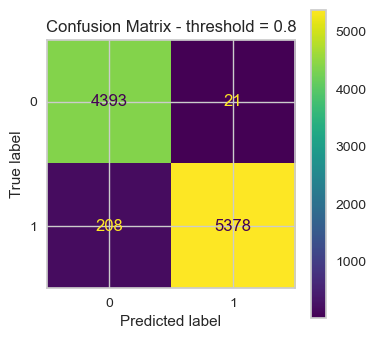

In [152]:
confusion_mat_4_08 = confusion_matrix(y_valid, y_pred_4_08)
disp = ConfusionMatrixDisplay(confusion_mat_4_08)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
# disp.plot(ax=ax, cmap="coolwarm")
plt.title("Confusion Matrix - threshold = 0.8")
plt.show()

In [153]:
threshold = 0.3
y_pred_4_03 = (model_4.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_4_03)

array([[4273,  141],
       [  35, 5551]], dtype=int64)

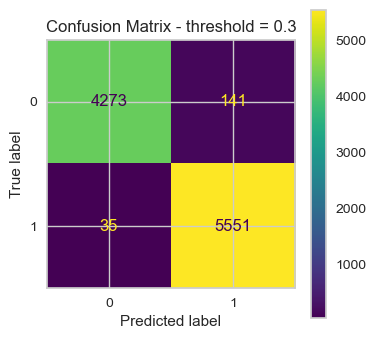

In [155]:
confusion_mat_4_03 = confusion_matrix(y_valid, y_pred_4_03)
disp = ConfusionMatrixDisplay(confusion_mat_4_03)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - threshold = 0.3")
plt.show()

<div style=" background-color:#A1D6E2;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The score AUC for  threshold = 0.3 is not so well AUC =  74% but not so good as for threshold=05. 
<li> TP and FP are definitelly better, there is a lot of values in this same time  FN has dropped.
</ul>
</div>

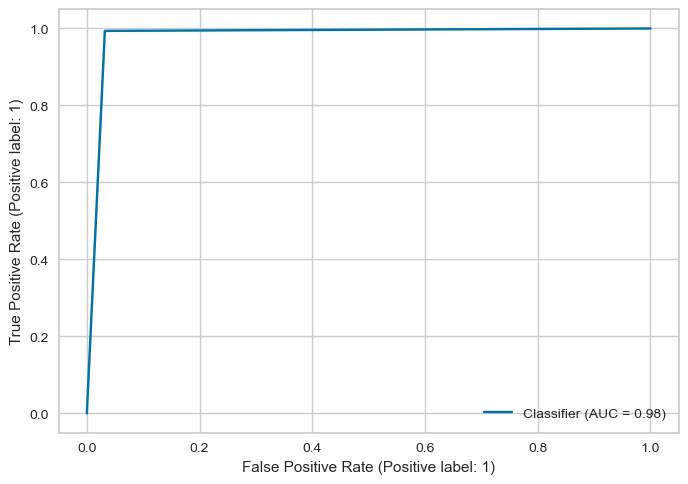

In [156]:
RocCurveDisplay.from_predictions(y_valid, y_pred_4_03)

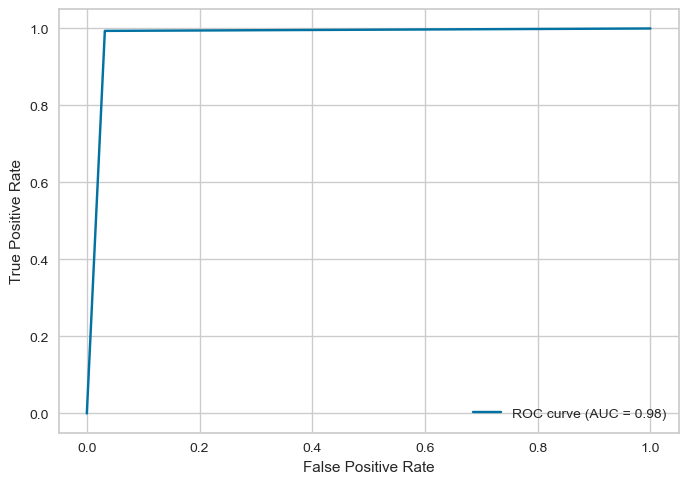

In [157]:
roc_auc = roc_auc_score(y_valid, y_pred_4_03)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred_4_03, pos_label=1)

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()

 ### <a id="V.4.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.2 RandomForestClassifier - TunedThresholdClassifierCV</p>

In [97]:
from sklearn.model_selection import TunedThresholdClassifierCV

In [98]:
classifier_tuned = TunedThresholdClassifierCV(
                                               model_41,
                                               scoring="f1").fit(X_train, y_train)
# precision,  f1,accuracy,  recall

In [99]:
# tuned_fraud_model.fit(X_train, y_train)

In [100]:
y_pred_41_tuned = classifier_tuned.predict(X_valid)

In [101]:
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, average_precision_score

avg_f1_train = classifier_tuned.best_score_
print(f"Average F1 on the training set: {avg_f1_train:.3f}")
print(f"Threshold: {classifier_tuned.best_threshold_: .3f}")

print(f"Original model:")
print(f"'f1_score': {round(f1_score(y_valid, y_pred_41),4)}"),
print(f"'P-R score': {round(average_precision_score(y_valid, y_pred_41),4)}"),
print(f"'matthews': {round(matthews_corrcoef(y_valid, y_pred_41),4)}"),
print(f"'accuracy': {round(accuracy_score(y_valid, y_pred_41),4)}"),
print(f"'recall': {round(recall_score(y_valid, y_pred_41),4)}"),
print(f"'precision': {round(precision_score(y_valid, y_pred_41),4)}")

print(f"Tuned model:")
print(f"'f1_score': {round(f1_score(y_valid, y_pred_41_tuned),4)}"),
print(f"'P-R score': {round(average_precision_score(y_valid, y_pred_41_tuned),4)}"),
print(f"'matthews': {round(matthews_corrcoef(y_valid, y_pred_41_tuned),4)}"),
print(f"'accuracy': {round(accuracy_score(y_valid, y_pred_41_tuned),4)}"),
print(f"'recall': {round(recall_score(y_valid, y_pred_41_tuned),4)}"),
print(f"'precision': {round(precision_score(y_valid, y_pred_41_tuned),4)}")

Average F1 on the training set: 0.433
Threshold:  0.141
Original model:
'f1_score': 0.2129
'P-R score': 0.1588
'matthews': 0.174
'accuracy': 0.8664
'recall': 0.1489
'precision': 0.3731
Tuned model:
'f1_score': 0.4311
'P-R score': 0.2616
'matthews': 0.3762
'accuracy': 0.7375
'recall': 0.8198
'precision': 0.2924


In [102]:
print(f"Cut-off point found at {classifier_tuned.best_threshold_:.3f}")

Cut-off point found at 0.141


In [103]:
print(classification_report(y_valid, classifier_tuned.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52720
           1       0.29      0.82      0.43      7280

    accuracy                           0.74     60000
   macro avg       0.63      0.77      0.63     60000
weighted avg       0.89      0.74      0.78     60000



In [104]:
avg_f1_train = classifier_tuned.best_score_
print(f"Average F1 on the training set: {avg_f1_train:.3f}")
print(f"Threshold: {classifier_tuned.best_threshold_: .3f}")

Average F1 on the training set: 0.433
Threshold:  0.141


In [108]:
def create_measures_tuned(y,y_pred):
    # minimalna wartość dla cut offa dla takiej samej ilości badów jak występuje w próbce
#     cut_off = np.sort(y_pred)[-y.sum():].min()
    cut_off = 0.141
    y_pred_class = np.array([0 if x < cut_off else 1 for x in y_pred])
     
    d = {'f1_score': [round(f1_score(y, y_pred_class),4)],
         'P-R score': [round(average_precision_score(y, y_pred_class),4)],
         'matthews': [round(matthews_corrcoef(y, y_pred_class),4)],
         'accuracy': [round(accuracy_score(y, y_pred_class),4)],
         'recall': [round(recall_score(y, y_pred_class),4)],
         'precision': [round(precision_score(y, y_pred_class),4)],
         'min cut_off': cut_off,
        }
     
    return pd.DataFrame.from_dict(d)
  
def calculating_metrics_tuned(X_train, X_valid, y_train, y_valid, model):
    train = create_measures_tuned(y_train, model.predict_proba(X_train)[:, 1])
    valid = create_measures_tuned(y_valid, model.predict_proba(X_valid)[:, 1])
      
    return pd.concat([train,valid]).set_index([pd.Index(['TRAIN', 'VALID'])]) 

In [105]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_41)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     0.999      0.999     0.999     1.000   1.000      0.999        0.452
VALID     0.370      0.211     0.277     0.837   0.395      0.347        0.357

In [109]:
calculating_metrics_tuned(X_train, X_valid, y_train, y_valid, classifier_tuned)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     0.733      0.579     0.721     0.910   1.000      0.579        0.141
VALID     0.431      0.262     0.376     0.738   0.820      0.292        0.141

 ### <a id="V.5"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.5 LGBMClassifier</p>

In [27]:
model_5 = LGBMClassifier(random_state= 42)

In [28]:
model_5.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 21921, number of negative: 18079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548025 -> initscore=0.192694
[LightGBM] [Info] Start training from score 0.192694


LGBMClassifier(random_state=42)

 ### <a id="V.5.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.5.1 LGBMClassifier - Validation</p>

In [166]:
model_train(model_5, 'LGBMClassifier')

[LightGBM] [Info] Number of positive: 21996, number of negative: 18004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549900 -> initscore=0.200267
[LightGBM] [Info] Start training from score 0.200267
LGBMClassifier - Train Score = 98.7675%
LGBMClassifier - Valid Score = 98.55000000000001%
LGBMClassifier - Mean Squared Error = 0.0145
LGBMClassifier - Mean Absolute Error = 0.0145


In [167]:
kfold_AUC(model_5)

[LightGBM] [Info] Number of positive: 17676, number of negative: 14324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552375 -> initscore=0.210271
[LightGBM] [Info] Start training from score 0.210271
[LightGBM] [Info] Number of positive: 17595, number of negative: 14405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [bin

In [168]:
kfold_accuracy_RSKFold(model_5)

[LightGBM] [Info] Number of positive: 17596, number of negative: 14404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549875 -> initscore=0.200166
[LightGBM] [Info] Start training from score 0.200166
[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549906 -> initscore=0.200292
[LightGBM] [Info] Start training from score 0.200292
[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549906 -> initscore=0.200292
[LightGBM] [Info] Start training from score 0.200292
[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549906 -> initscore=0.200292
[LightGBM] [Info] Start training from score 0.200292
[LightGBM] [Info] Number of positive: 17597, number of negative: 14403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 55
[LightGBM] [Info] [bin

In [30]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_5)

f1_score  P-R score  matthews  accuracy  recall  precision  min cut_off
TRAIN     0.990      0.985     0.978     0.989   0.990      0.990        0.382
VALID     0.987      0.981     0.971     0.986   0.987      0.987        0.323

In [169]:
y_pred_5 = model_5.predict(X_valid)

In [170]:
y_proba_5 = model_5.predict_proba(X_valid)[:,1]
print("Validation Area Under the Curve (AUC): ", roc_auc_score(y_valid, y_proba_5))

Validation Area Under the Curve (AUC):  0.9964722432983878


In [171]:
print(classification_report(y_valid,y_pred_5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4414
           1       0.99      0.99      0.99      5586

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



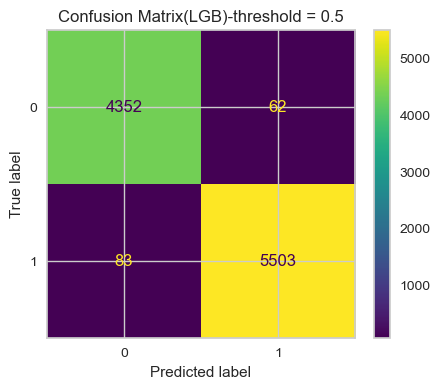

In [180]:
confusion_mat_5 = confusion_matrix(y_valid, y_pred_5)
disp = ConfusionMatrixDisplay(confusion_mat_5)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix(LGB)-threshold = 0.5")
plt.show()

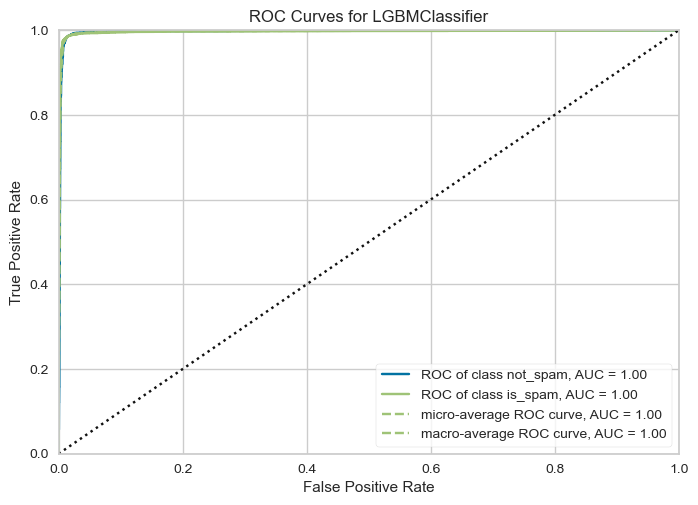

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [182]:
visualizer_5 = ROCAUC(model_5, classes=["not_spam", "is_spam"])
visualizer_5.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_5.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_5.show()  

### <a id="V.6"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.6 VotingClassifier</p>

In [78]:
voting_classifier_6 = VotingClassifier(estimators=[
    ('XGBClassifier', model_3),
    ('RandomForestClassifier', model_4),
    ('LGBMClassifier', model_5),       
],weights=[2.0,2.0,1.0])

In [79]:
voting_classifier_6.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 21921, number of negative: 18079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548025 -> initscore=0.192694
[LightGBM] [Info] Start training from score 0.192694


VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            le...
                                            max_delta_step=None, max_depth=13,
                                            max_leaves=None, min_child_weight=5,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(n_estimators=42, n_jobs=1,
                                                     random_state=42,
                                                     verbose=False)),
                             ('LGBMClassifier',
                              LGBMClassifier(random_state=42))],
                 weights=[2.0, 2.0, 1.0])

 ### <a id="V.6.1"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.6.1 VotingClassifier - Validation</p>

In [72]:
voting_classifier_6.score(X_train,y_train)

0.995675

In [80]:
model_train(voting_classifier_6, 'VotingClassifier_6 ')

[LightGBM] [Info] Number of positive: 21921, number of negative: 18079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548025 -> initscore=0.192694
[LightGBM] [Info] Start training from score 0.192694
VotingClassifier_6  - Train Score = 99.5675%
VotingClassifier_6  - Valid Score = 98.79%
VotingClassifier_6  - Mean Squared Error = 0.0121
VotingClassifier_6  - Mean Absolute Error = 0.0121


In [81]:
y_pred_6 = voting_classifier_6.predict(X_valid)

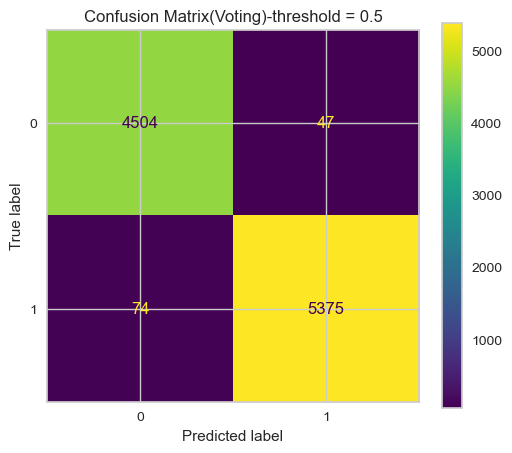

In [82]:
confusion_mat_6 = confusion_matrix(y_valid, y_pred_6)
disp = ConfusionMatrixDisplay(confusion_mat_6)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax)
plt.title("Confusion Matrix(Voting)-threshold = 0.5")
plt.show()

In [76]:
kfold_accuracy(voting_classifier_6)

[LightGBM] [Info] Number of positive: 17536, number of negative: 14464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548000 -> initscore=0.192593
[LightGBM] [Info] Start training from score 0.192593
[LightGBM] [Info] Number of positive: 17537, number of negative: 14463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 71
[LightGBM] [Info] [bin

In [83]:
matthews_corrcoef(y_valid, y_pred_6)

0.975629627441905

 ### <a id="V.6.2"><p style="background-color: #A1BE95;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.6.2 VotingClassifier - Evaluation</p>

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
VotingClassifier:
<li> Train Score = 99.5675%
<li> Valid Score = 98.79%
<li> Mean Squared Error = 0.0121
<li> Matthews correlation coefficient (MCC) = 0.9756
<li> Accuracy = 0.989
<li> FN = 47
<li> FP = 74
</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="VI"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#A1BE95;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span>VI CONCLUSION</div>

<div style=" background-color:#F98866;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">

The goal is to predict whether a mushroom is edible or poisonous based on its physical features, such as color, shape, and texture.
To tackle this problem, we'll be analyzing a special dataset. This dataset was created by a deep learning model that studied thousands of mushrooms. While the data is similar to a well-known mushroom dataset, there are some differences that make this project unique.
This project will be implemented based on a real dataset, provided by the project organizer. The goal is to develop a model that can classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

In  was  develop the pipeline based on  classification models.
Models was split into 5 parts: 
<ul>
V.1 XGBClassifier:
<li> Best score is for XGBClassifier Tuning - Optuna:
    <li> Train Score = 99.0175%
    <li> Valid Score = 98.82%
    <li> Mean Squared Error = 0.0118
    <li> Matthews correlation coefficient <mark style="background-color:#A1D6E2;color:white;border-radius:5px;opacity:1.0">(MCC) = 0.974</mark>
    <li> ROC AUC = 0.9956
    <li> FN = 44
    <li> FP = 74
</ul>
<ul>
V.2 CatBoostClassifier:
<li> Train Score = 91.1075%
<li> Valid Score = 90.44%
<li> Mean Squared Error = 0.0956
<li> Matthews correlation coefficient <mark style="background-color:#A1D6E2;color:white;border-radius:5px;opacity:1.0">(MCC) = 0.807</mark>
<li> ROC AUC = 0.9654
 <li> FN = 405
<li> FP = 551
</ul>
<ul>
V.3 RandomForestClassifier Tuning - Optuna:
<li> Train Score = 99.155%
<li> Valid Score = 98.67%
<li> Mean Squared Error = 0.0133
<li> Matthews correlation coefficient <mark style="background-color:#A1D6E2;color:white;border-radius:5px;opacity:1.0">(MCC) = 0.972</mark>
<li> ROC AUC = 0.9941
<li> FN = 53
<li> FP = 80
</ul>
<ul>
V.4 LGBMClassifier uning - Optuna:
<li> Train Score = 99.9475%
<li> Valid Score = 98.81%
<li> Mean Squared Error = 0.0119
<li> Matthews correlation coefficient <mark style="background-color:#A1D6E2;color:white;border-radius:5px;opacity:1.0">(MCC) = 0.971</mark>
<li> ROC AUC = 0.9947
<li> FN = 49
<li> FP = 70
</ul>
<ul>
V.5 VotingClassifier 1:
<li> Train Score = 99.5675%
<li> Valid Score = 98.79%
<li> Mean Squared Error = 0.0121
<li> Matthews correlation coefficient <mark style="background-color:red;color:white;border-radius:5px;opacity:1.0">(MCC) = 0.9754</mark>
<li> Accuracy = 0.989
<li> FN = 53
<li> FP = 38
</ul>

We started with classifiers for which we obtained an MCC score  80% for Catboost. After that it was changed preprocessor and the results improved significantly.
We followed with an series of traditional classification models for which scores was aound 97%.

At the end was tested models based on VotingClassifier.
This model is based on the three best ones: XGBClassifier, RandomForestClassifier and  LGBMClassifier.  As a result we obtained an MCC score of 98.4% which is the  best result from all tests.


The score AUC is defenitely the best for threshold = 0.5, and if we look at the confusion matrix we can see false negative score is very small which is magnificent for us.   
</div>